# Prueba Nikolas Rodriguez

Modelo de clasificación para obtener la probabilidad de que una oportunidad de venta sea efectiva

## Proceso Entrenamiento

1. Entrenamiento general para realizar la eliminación de variables
2. Entrenamiento con variables eliminadas que no aportan
3. Entrenamiento con variables eliminadas y balanceo de datos usando SMOTE

Importar librerías y lectura de los datos de entrenamiento

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from pycaret.classification import *

from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import pickle

In [2]:
df = pd.read_csv('../BD/oportunidad.csv')

df

Opportunity Number        Supplies Subgroup          Supplies Group  \
0                     NaN          Car Electronics         Car Electronics   
1                     NaN        Garage & Car Care         Car Accessories   
2                     NaN            Shelters & RV  Performance & Non-auto   
3                     NaN         Motorcycle Parts  Performance & Non-auto   
4                     NaN        Replacement Parts         Car Accessories   
...                   ...                      ...                     ...   
31818           9966870.0  Batteries & Accessories         Car Accessories   
31819           9977169.0         Motorcycle Parts  Performance & Non-auto   
31820           9977719.0        Garage & Car Care         Car Accessories   
31821           9991099.0     Exterior Accessories         Car Accessories   
31822           9995847.0        Performance Parts  Performance & Non-auto   

      Opportunity Result  Sales Stage Change Count  \
0                    Won                         5   
1                    Won                         4   
2                   Loss                         4   
3                   Loss                         2   
4                    Won                         3   
...                  ...                       ...   
31818                Won                         3   
31819               Loss                         5   
31820                Won                         2   
31821               Loss                         2   
31822                Won                         5   

       Total Days Identified Through Closing  \
0                                         94   
1                                          4   
2                                         71   
3                                         46   
4                                          6   
...                                      ...   
31818                                      5   
31819                                      3   
31820                                      4   
31821                                      3   
31822                                      2   

       Total Days Identified Through Qualified  Opportunity Amount USD  \
0                                           90                  469000   
1                                            4                    5000   
2                                           71                  200000   
3                                           46                  120000   
4                                            6                   12000   
...                                        ...                     ...   
31818                                        5                   20000   
31819                                        3                   50000   
31820                                        4                   15000   
31821                                        3                   30000   
31822                                        1                   50000   

       Client Size By Revenue  Client Size By Employee Count  \
0                           1                              1   
1                           3                              2   
2                           3                              1   
3                           5                              1   
4                           1                              1   
...                       ...                            ...   
31818                       1                              1   
31819                       1                              1   
31820                       1                              1   
31821                       1                              1   
31822                       1                              1   

       Revenue From Client Past Two Years Competitor Type  Deal Size Category  \
0                                       0            None                   6   
1                       

In [3]:
df2 = pd.read_excel('../BD/Countries.xlsx')

df2

Country  ID
0    Bolivia   1
1     Brasil   2
2      Chile   3
3   Colombia   4
4    Ecuador   5
5       Peru   6
6  Venezuela   7
7    Francia   8
8   Alemania   9

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31823 entries, 0 to 31822
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       31515 non-null  float64
 1   Supplies Subgroup                        31823 non-null  object 
 2   Supplies Group                           31823 non-null  object 
 3   Opportunity Result                       31823 non-null  object 
 4   Sales Stage Change Count                 31823 non-null  int64  
 5   Total Days Identified Through Closing    31823 non-null  int64  
 6   Total Days Identified Through Qualified  31823 non-null  int64  
 7   Opportunity Amount USD                   31823 non-null  int64  
 8   Client Size By Revenue                   31823 non-null  int64  
 9   Client Size By Employee Count            31823 non-null  int64  
 10  Revenue From Client Past Two Years       31823

### Análisis Exploratorio de Datos (EDA)

In [5]:
df.describe()

Opportunity Number  Sales Stage Change Count  \
count        3.151500e+04              31823.000000   
mean         7.654080e+06                  2.959275   
std          1.053939e+06                  1.495948   
min          1.674737e+06                  1.000000   
25%          6.896082e+06                  2.000000   
50%          7.545469e+06                  3.000000   
75%          8.232192e+06                  3.000000   
max          1.009423e+07                 20.000000   

       Total Days Identified Through Closing  \
count                           31823.000000   
mean                               16.682745   
std                                16.615356   
min                                 0.000000   
25%                                 4.000000   
50%                                12.000000   
75%                                24.000000   
max                               192.000000   

       Total Days Identified Through Qualified  Opportunity Amount USD  \
count                             31823.000000            31823.000000   
mean                                 16.267291            91563.816391   
std                                  16.493823           132124.774314   
min                                   0.000000                0.000000   
25%                                   4.000000            15000.000000   
50%                                  12.000000            49418.000000   
75%                                  24.000000           105000.000000   
max                                 192.000000          1000000.000000   

       Client Size By Revenue  Client Size By Employee Count  \
count            31823.000000                   31823.000000   
mean                 1.621972                       1.607894   
std                  1.239402                       1.215011   
min                  1.000000                       1.000000   
25%                  1.000000                       1.000000   
50%                  1.000000                       1.000000   
75%                  1.000000                       1.000000   
max                  5.000000                       5.000000   

       Revenue From Client Past Two Years  Deal Size Category           Lat  \
count                        31823.000000        31823.000000  31823.000000   
mean                             0.304183            3.440719     -9.493641   
std                              0.934192            1.652327     10.574946   
min                              0.000000            1.000000    -24.367114   
25%                              0.000000            2.000000    -16.130262   
50%                              0.000000            3.000000     -9.275622   
75%                              0.000000            5.000000     -1.230374   
max                              4.000000            7.000000      7.928675   

                Lon  Country_Code  
count  31823.000000  31823.000000  
mean     -69.584912      4.201458  
std        8.658619      1.911526  
min      -79.453125      1.000000  
25%      -75.585938      3.000000  
50%      -68.730469      4.000000  
75%      -65.170898      6.000000  
max      -47.109375      7.000000

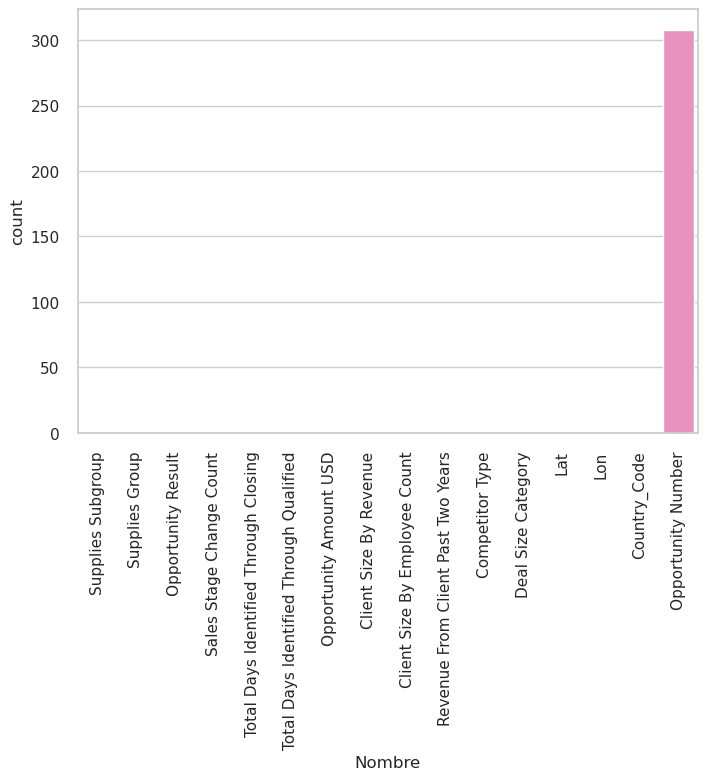

In [6]:
# Verificar Valores nulos
missing_values = df.isnull().sum()
missing_values.sort_values(inplace=True)


missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Nombre']
missing_values['Nombre'] = missing_values.index

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Nombre', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

## Análisis Uni-Variado

array([[<AxesSubplot:title={'center':'Opportunity Number'}>,
        <AxesSubplot:title={'center':'Sales Stage Change Count'}>,
        <AxesSubplot:title={'center':'Total Days Identified Through Closing'}>],
       [<AxesSubplot:title={'center':'Total Days Identified Through Qualified'}>,
        <AxesSubplot:title={'center':'Opportunity Amount USD'}>,
        <AxesSubplot:title={'center':'Client Size By Revenue'}>],
       [<AxesSubplot:title={'center':'Client Size By Employee Count'}>,
        <AxesSubplot:title={'center':'Revenue From Client Past Two Years'}>,
        <AxesSubplot:title={'center':'Deal Size Category'}>],
       [<AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Lon'}>,
        <AxesSubplot:title={'center':'Country_Code'}>]], dtype=object)

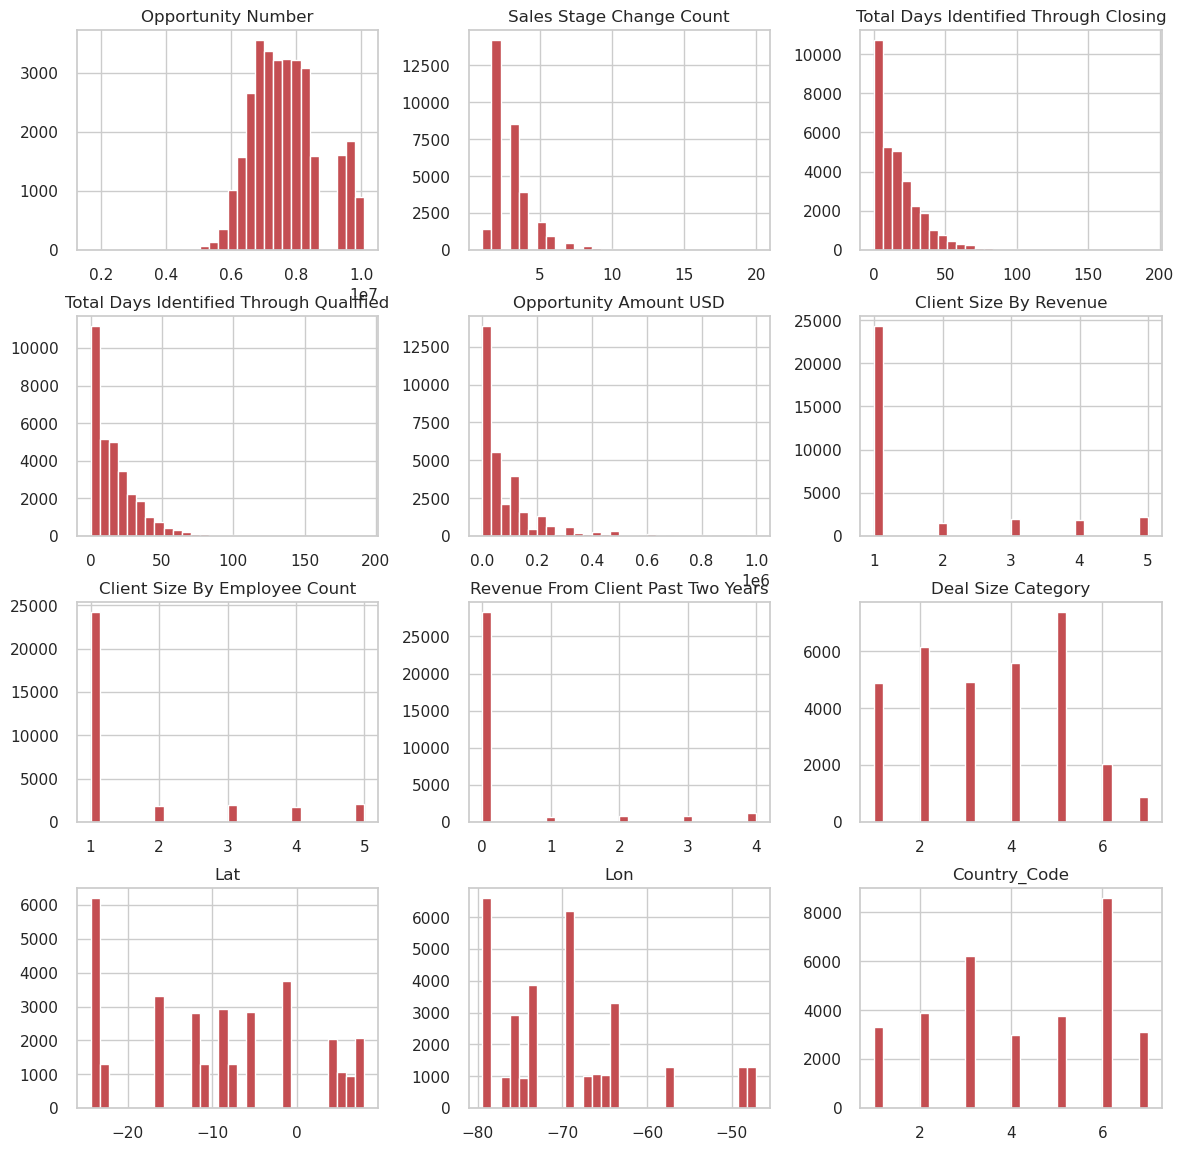

In [7]:
# Verificar distribuciones 
df.hist(bins = 30, figsize = (14,14), color = 'r')

### Convertir variable respuesta a binaria

In [8]:
var_objetivo = {df['Opportunity Result'].unique()[0]: 1, df['Opportunity Result'].unique()[1]:0}

df['Result'] = df['Opportunity Result'].map(var_objetivo)

df

Opportunity Number        Supplies Subgroup          Supplies Group  \
0                     NaN          Car Electronics         Car Electronics   
1                     NaN        Garage & Car Care         Car Accessories   
2                     NaN            Shelters & RV  Performance & Non-auto   
3                     NaN         Motorcycle Parts  Performance & Non-auto   
4                     NaN        Replacement Parts         Car Accessories   
...                   ...                      ...                     ...   
31818           9966870.0  Batteries & Accessories         Car Accessories   
31819           9977169.0         Motorcycle Parts  Performance & Non-auto   
31820           9977719.0        Garage & Car Care         Car Accessories   
31821           9991099.0     Exterior Accessories         Car Accessories   
31822           9995847.0        Performance Parts  Performance & Non-auto   

      Opportunity Result  Sales Stage Change Count  \
0                    Won                         5   
1                    Won                         4   
2                   Loss                         4   
3                   Loss                         2   
4                    Won                         3   
...                  ...                       ...   
31818                Won                         3   
31819               Loss                         5   
31820                Won                         2   
31821               Loss                         2   
31822                Won                         5   

       Total Days Identified Through Closing  \
0                                         94   
1                                          4   
2                                         71   
3                                         46   
4                                          6   
...                                      ...   
31818                                      5   
31819                                      3   
31820                                      4   
31821                                      3   
31822                                      2   

       Total Days Identified Through Qualified  Opportunity Amount USD  \
0                                           90                  469000   
1                                            4                    5000   
2                                           71                  200000   
3                                           46                  120000   
4                                            6                   12000   
...                                        ...                     ...   
31818                                        5                   20000   
31819                                        3                   50000   
31820                                        4                   15000   
31821                                        3                   30000   
31822                                        1                   50000   

       Client Size By Revenue  Client Size By Employee Count  \
0                           1                              1   
1                           3                              2   
2                           3                              1   
3                           5                              1   
4                           1                              1   
...                       ...                            ...   
31818                       1                              1   
31819                       1                              1   
31820                       1                              1   
31821                       1                              1   
31822                       1                              1   

       Revenue From Client Past Two Years Competitor Type  Deal Size Category  \
0                                       0            None                   6   
1                       

array([[<AxesSubplot:title={'center':'Opportunity Number'}>,
        <AxesSubplot:title={'center':'Sales Stage Change Count'}>,
        <AxesSubplot:title={'center':'Total Days Identified Through Closing'}>,
        <AxesSubplot:title={'center':'Total Days Identified Through Qualified'}>],
       [<AxesSubplot:title={'center':'Opportunity Amount USD'}>,
        <AxesSubplot:title={'center':'Client Size By Revenue'}>,
        <AxesSubplot:title={'center':'Client Size By Employee Count'}>,
        <AxesSubplot:title={'center':'Revenue From Client Past Two Years'}>],
       [<AxesSubplot:title={'center':'Deal Size Category'}>,
        <AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Lon'}>,
        <AxesSubplot:title={'center':'Country_Code'}>],
       [<AxesSubplot:title={'center':'Result'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

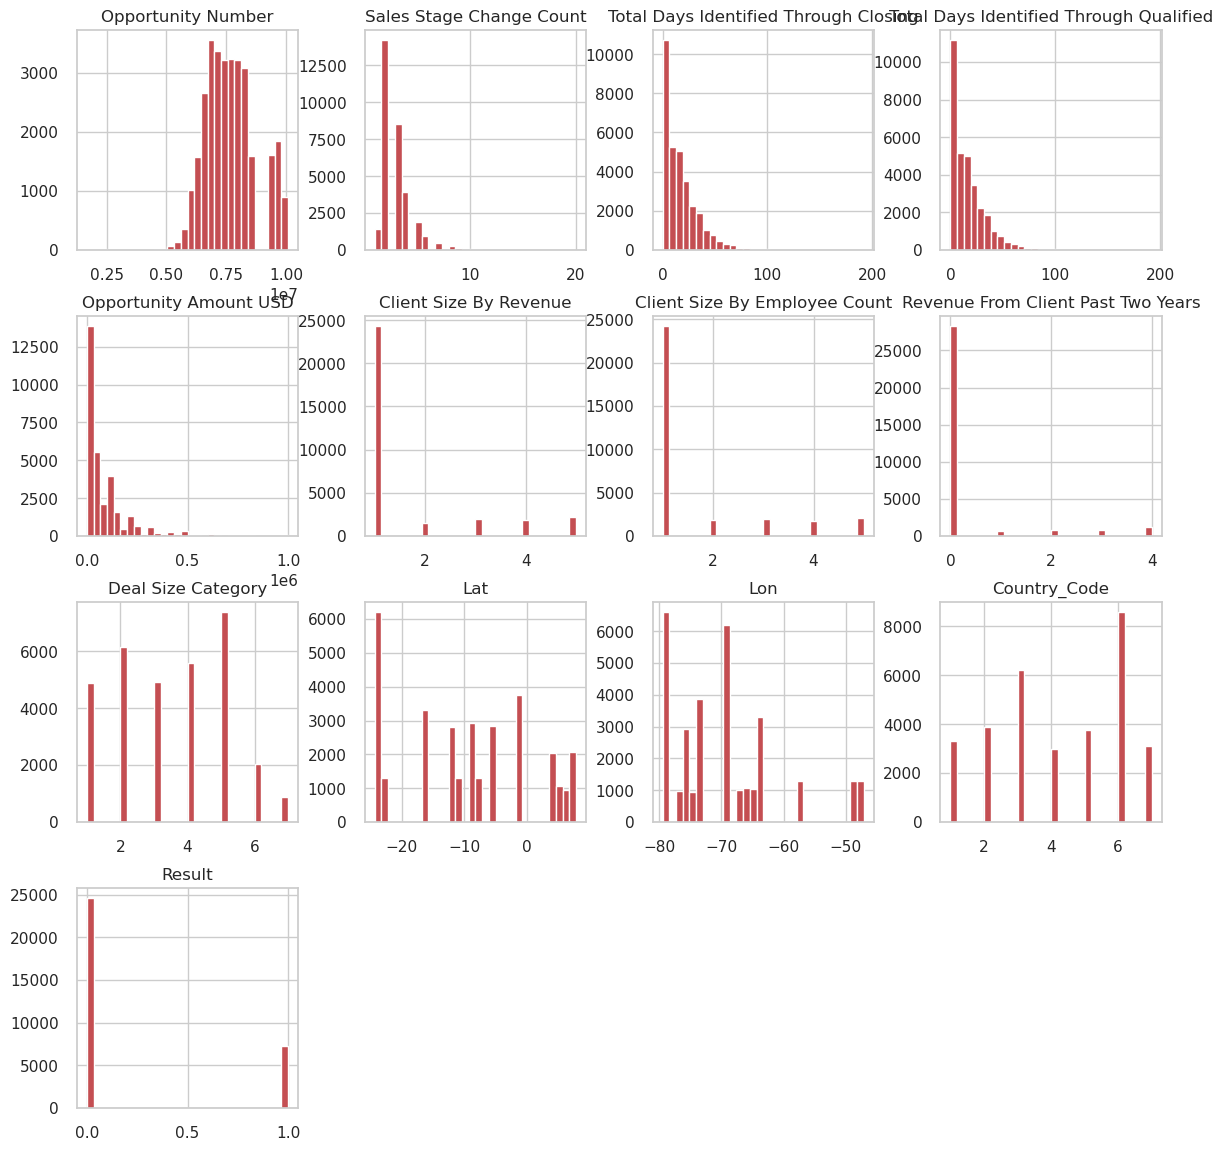

In [9]:
df.hist(bins = 30, figsize = (14,14), color = 'r')

## Verificar posible desbalanceo de datos en la variable respuesta

In [10]:
# ¡Veamos cuántos clientes podrían incumplir con el pago con tarjeta de crédito!
Positivo        = df[df['Result'] == 1]
Negativo      = df[df['Result'] == 0]

print("Total =", len(df))

print("Número Oportunidades positivas =", len(Positivo))
print("Porcentaje dOportunidades positivas =", 1.*len(Positivo)/len(df)*100.0, "%")
 
print("Número Oportunidades negativas =", len(Negativo))
print("Porcentaje Oportunidades negativas =", 1.*len(Negativo)/len(df)*100.0, "%")

Total = 31823
Número Oportunidades positivas = 7246
Porcentaje dOportunidades positivas = 22.769694874776107 %
Número Oportunidades negativas = 24577
Porcentaje Oportunidades negativas = 77.2303051252239 %


## Análisis Bi-Variado

Se realiza un análisis bi-variado de las variables númericas y categoricas contrastandolas con la variable respuesta

<AxesSubplot:>

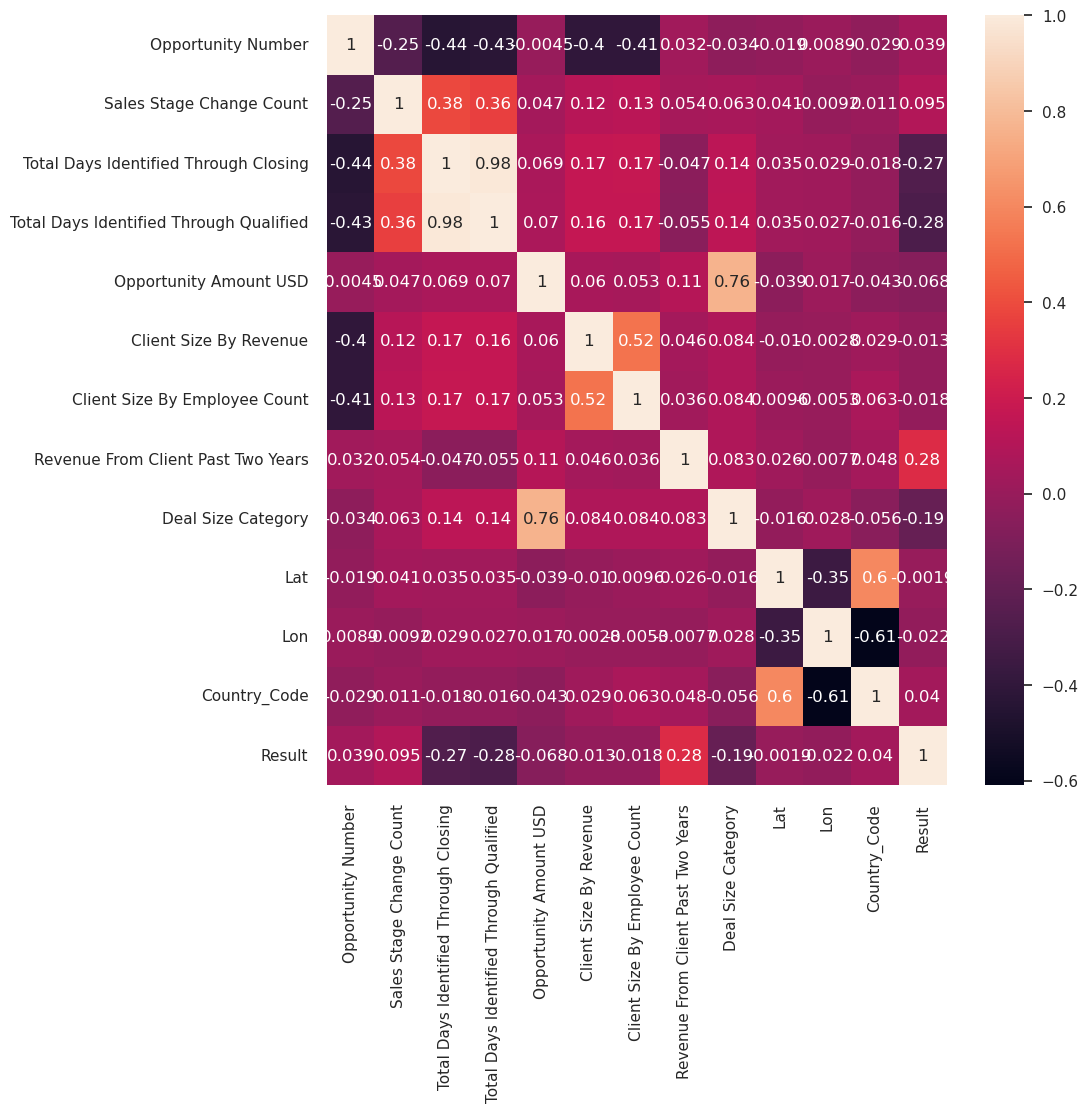

In [11]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)

In [12]:
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(df,
    dimensions = df.columns[:8], color = 'Opportunity Amount USD')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

<Figure size 1500x1500 with 0 Axes>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31823 entries, 0 to 31822
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       31515 non-null  float64
 1   Supplies Subgroup                        31823 non-null  object 
 2   Supplies Group                           31823 non-null  object 
 3   Opportunity Result                       31823 non-null  object 
 4   Sales Stage Change Count                 31823 non-null  int64  
 5   Total Days Identified Through Closing    31823 non-null  int64  
 6   Total Days Identified Through Qualified  31823 non-null  int64  
 7   Opportunity Amount USD                   31823 non-null  int64  
 8   Client Size By Revenue                   31823 non-null  int64  
 9   Client Size By Employee Count            31823 non-null  int64  
 10  Revenue From Client Past Two Years       31823

<AxesSubplot:xlabel='Total Days Identified Through Closing', ylabel='count'>

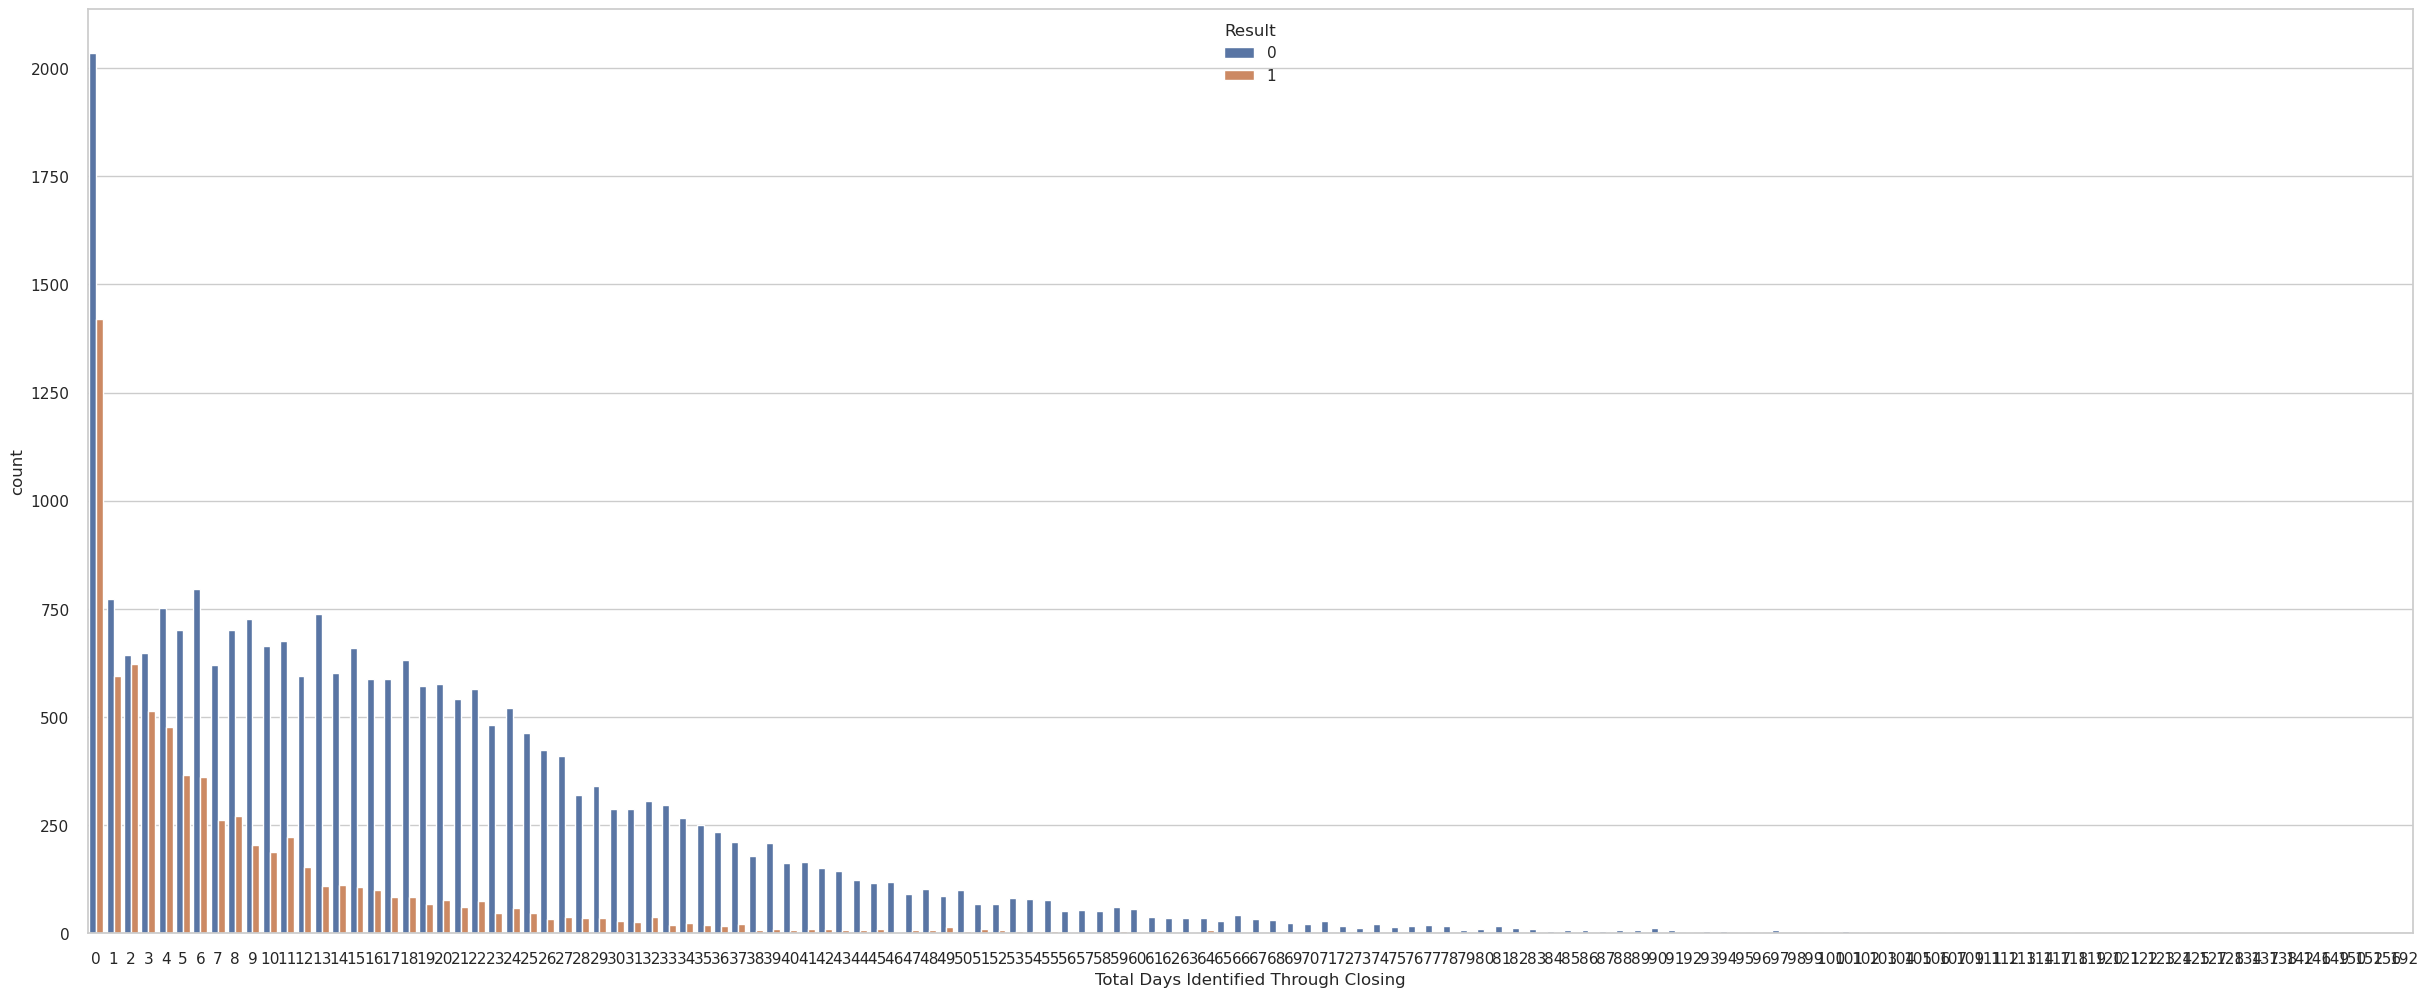

In [14]:
plt.figure(figsize=[30, 12])
sns.countplot(x = 'Total Days Identified Through Closing', hue = 'Result', data = df)

<AxesSubplot:xlabel='Total Days Identified Through Qualified', ylabel='count'>

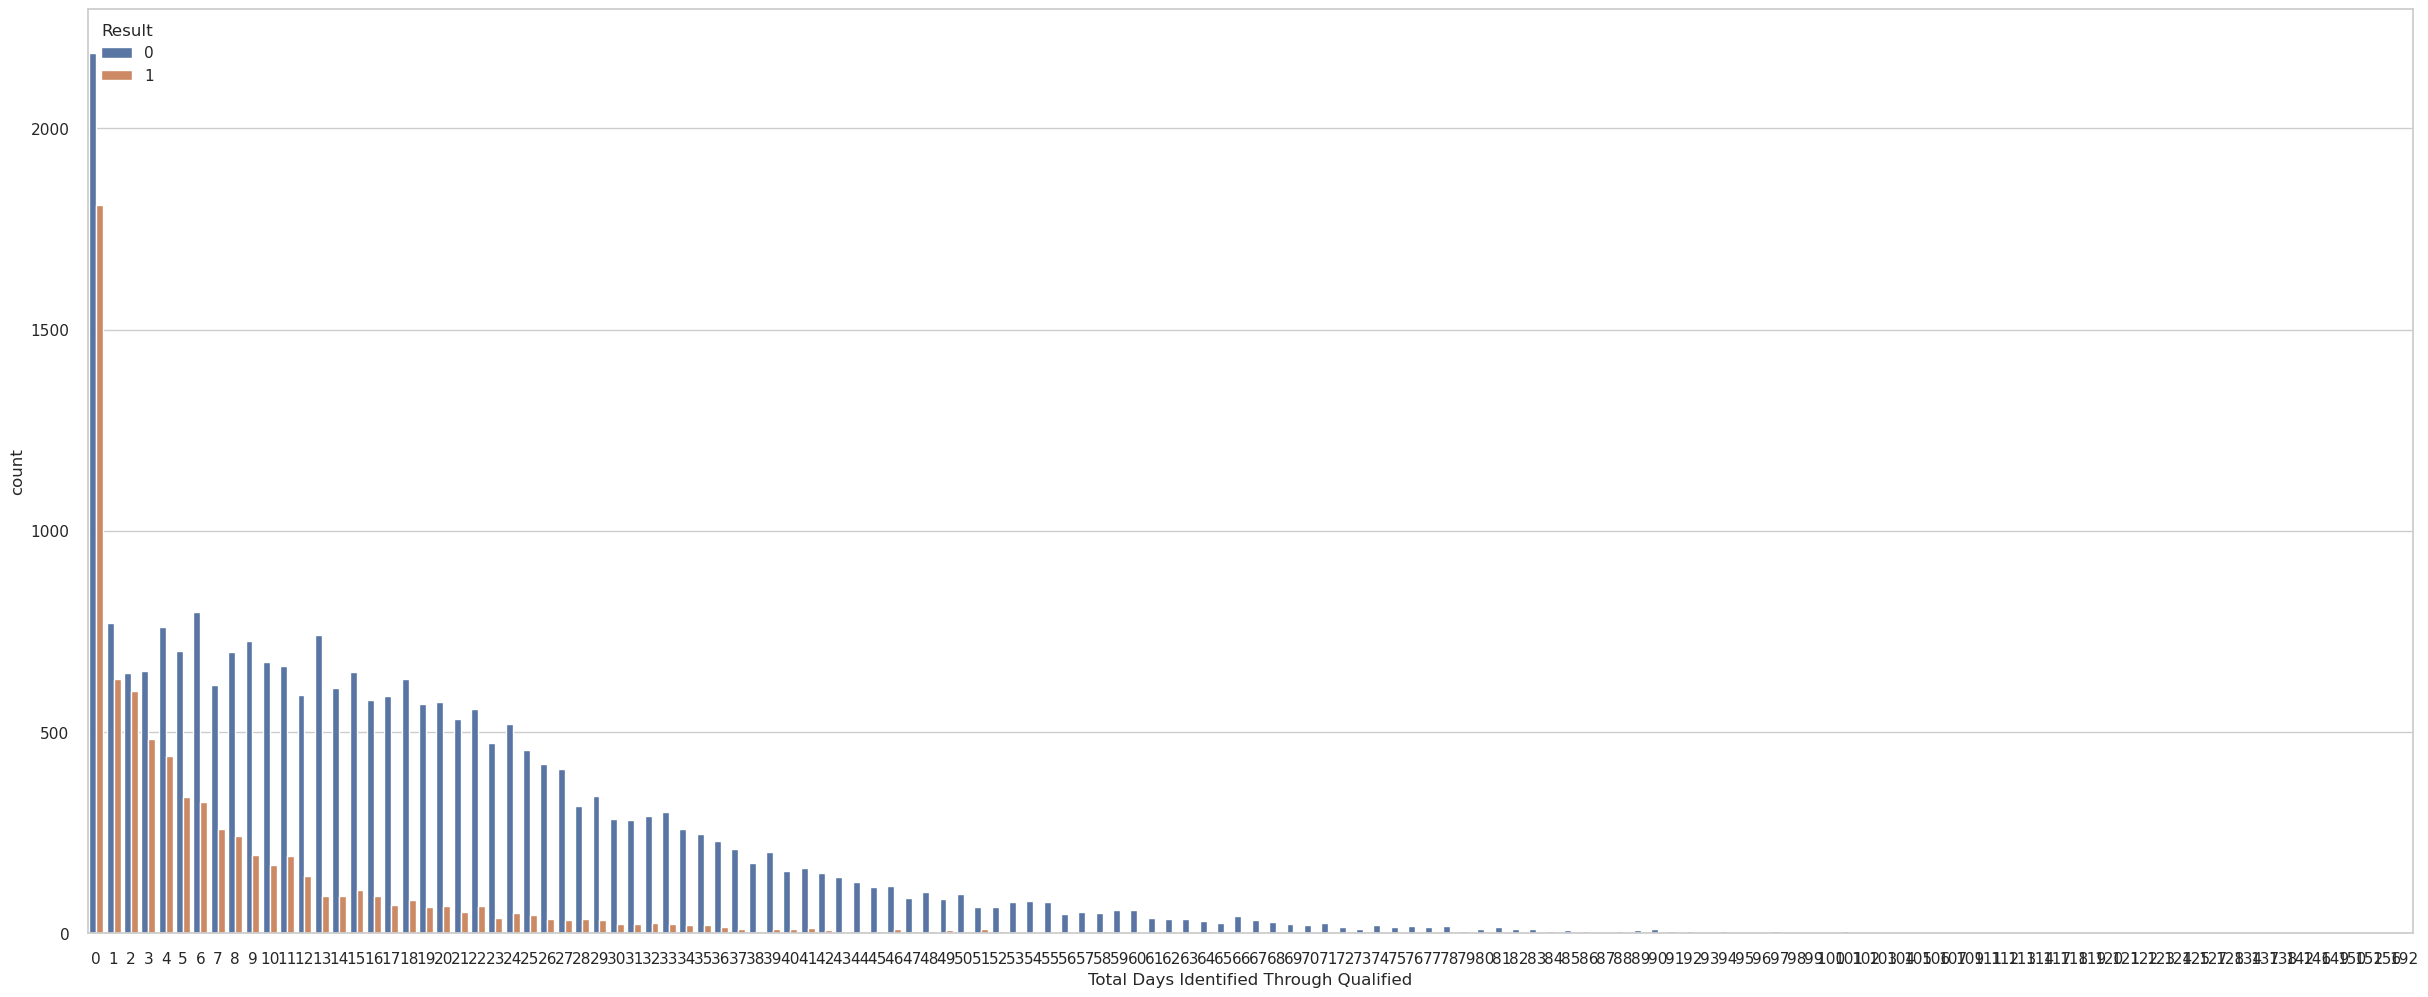

In [15]:
plt.figure(figsize=[30, 12])
sns.countplot(x = 'Total Days Identified Through Qualified', hue = 'Result', data = df)

<AxesSubplot:xlabel='Revenue From Client Past Two Years', ylabel='count'>

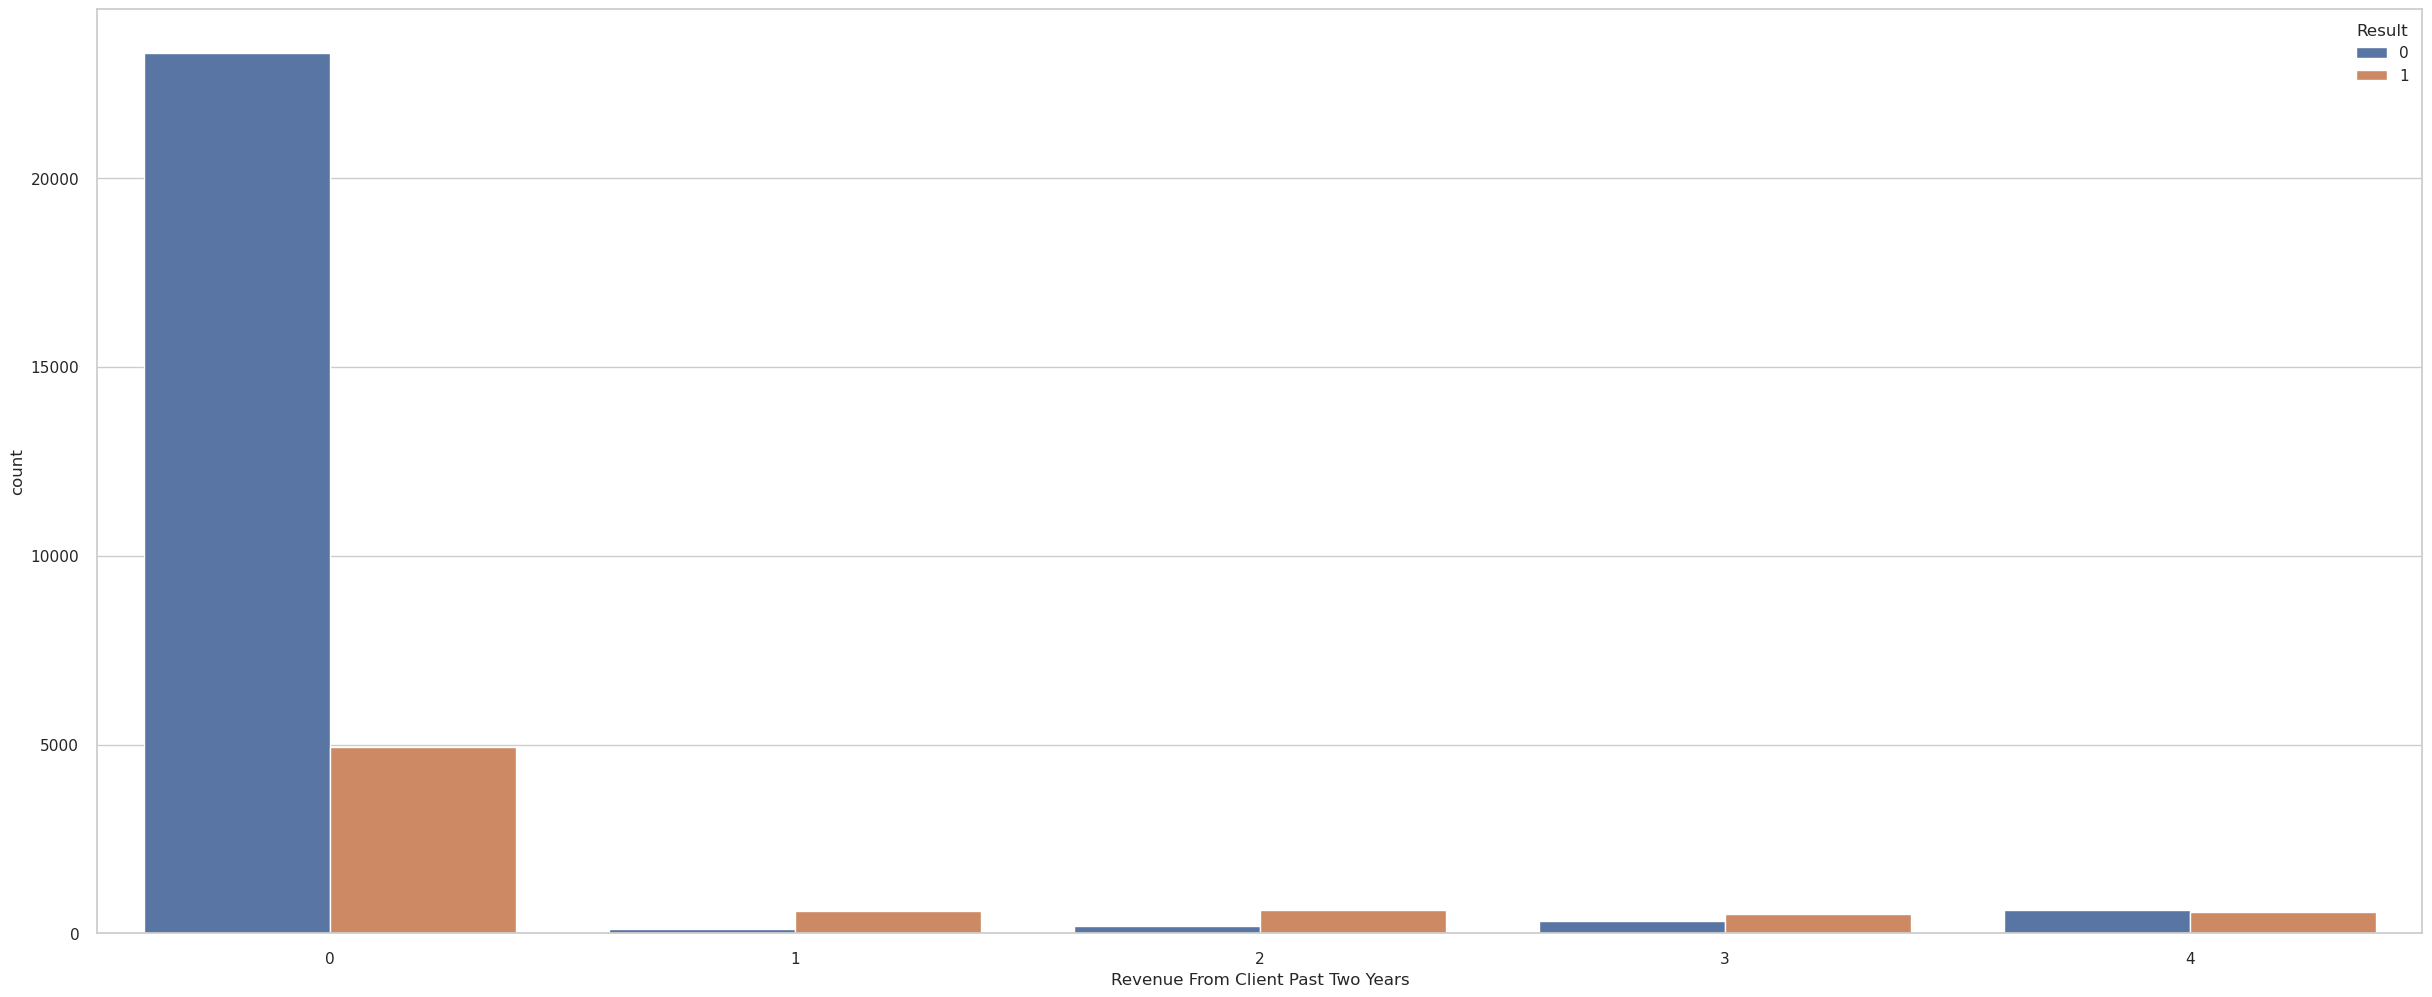

In [16]:
plt.figure(figsize=[30, 12])
sns.countplot(x = 'Revenue From Client Past Two Years', hue = 'Result', data = df)

<AxesSubplot:xlabel='Deal Size Category', ylabel='count'>

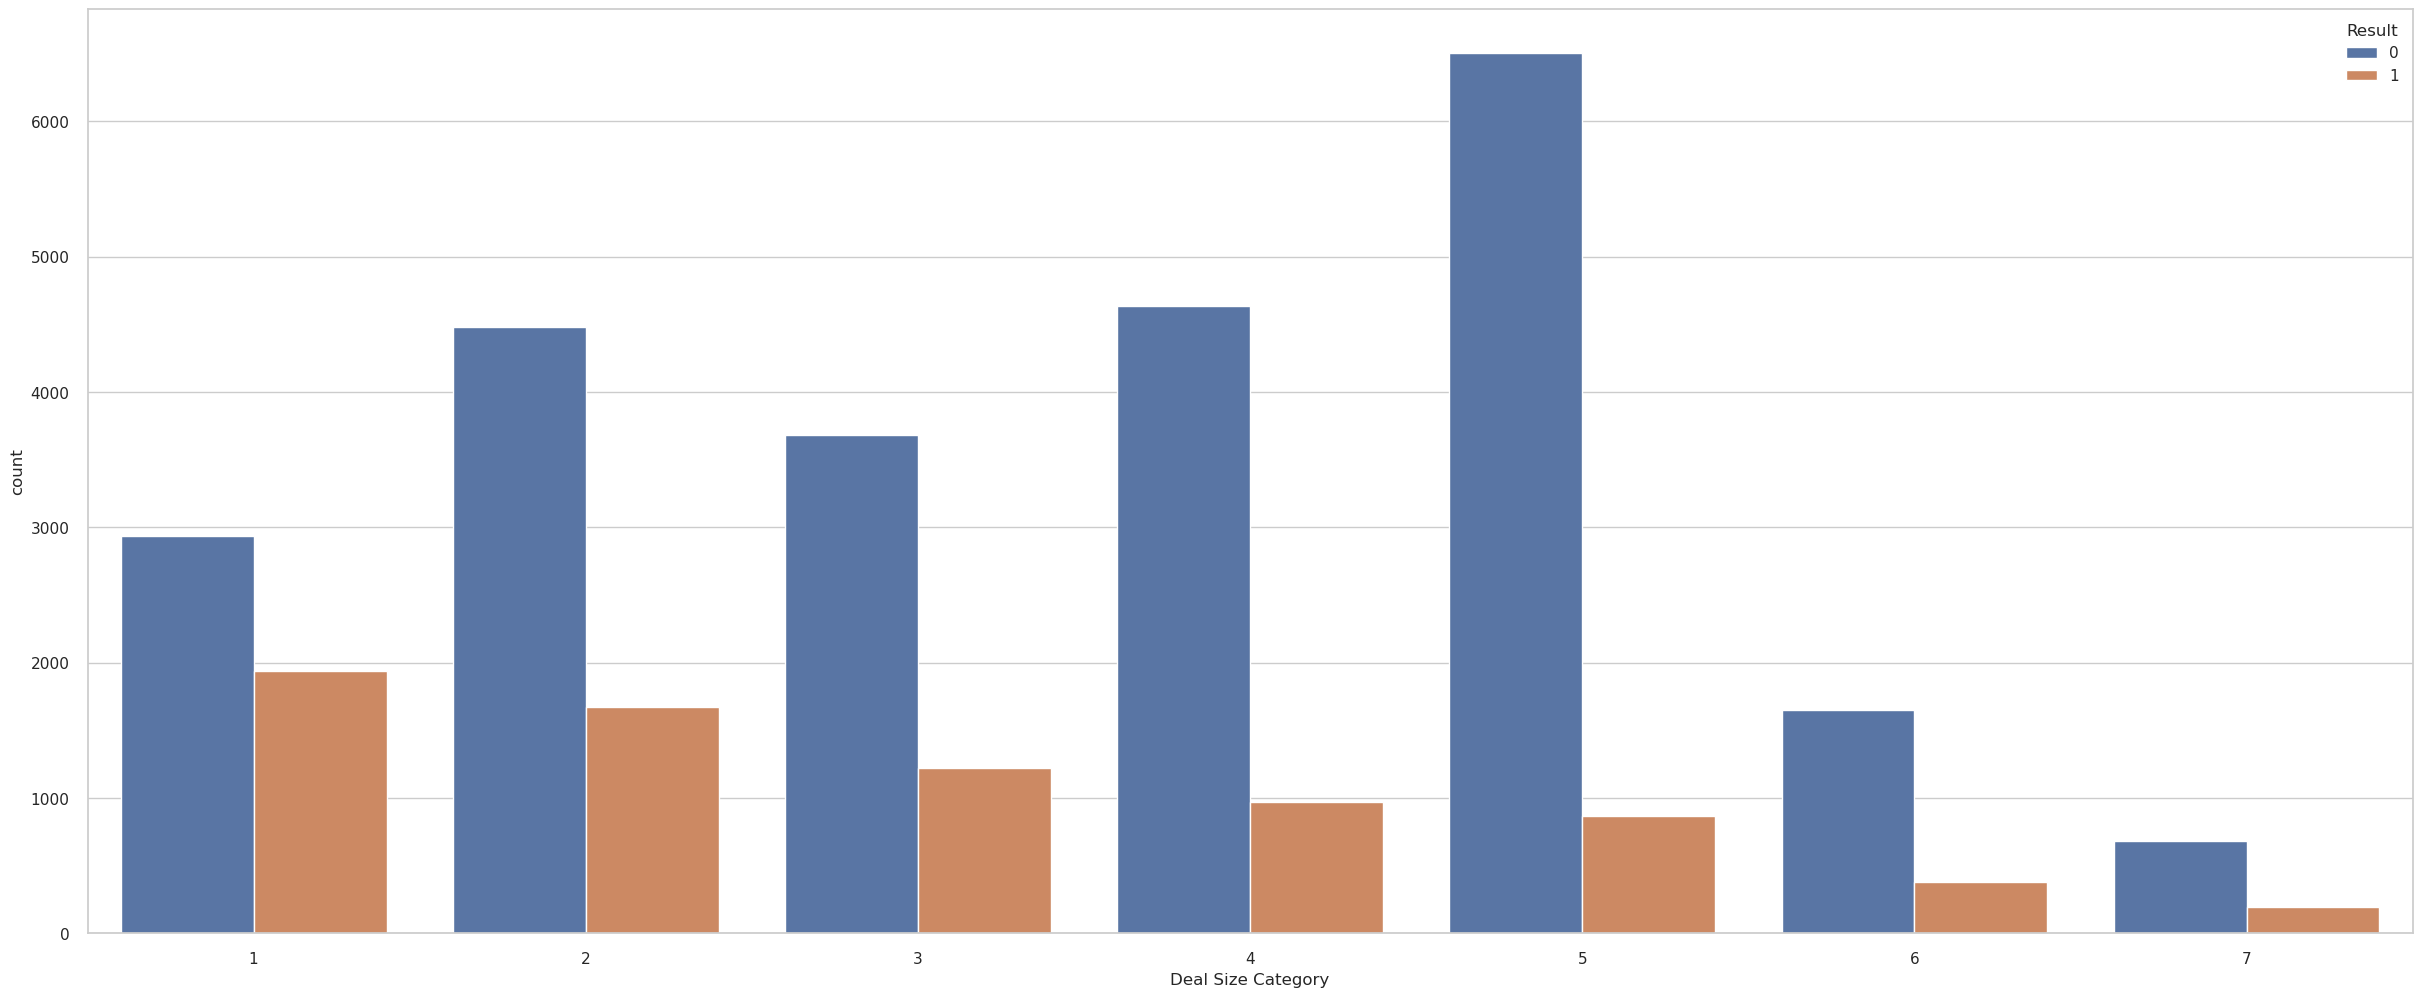

In [17]:
plt.figure(figsize=[30, 12])
sns.countplot(x = 'Deal Size Category', hue = 'Result', data = df)

### Distribuciones variables categoricas

In [18]:
def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = df[x].value_counts().index, y = df[x].value_counts(), color = df[x].value_counts().index, height = 600)
  fig.show()


barplot_visualization('Supplies Subgroup')

In [19]:
barplot_visualization('Supplies Group')

In [20]:
barplot_visualization('Competitor Type')

<AxesSubplot:xlabel='Competitor Type', ylabel='count'>

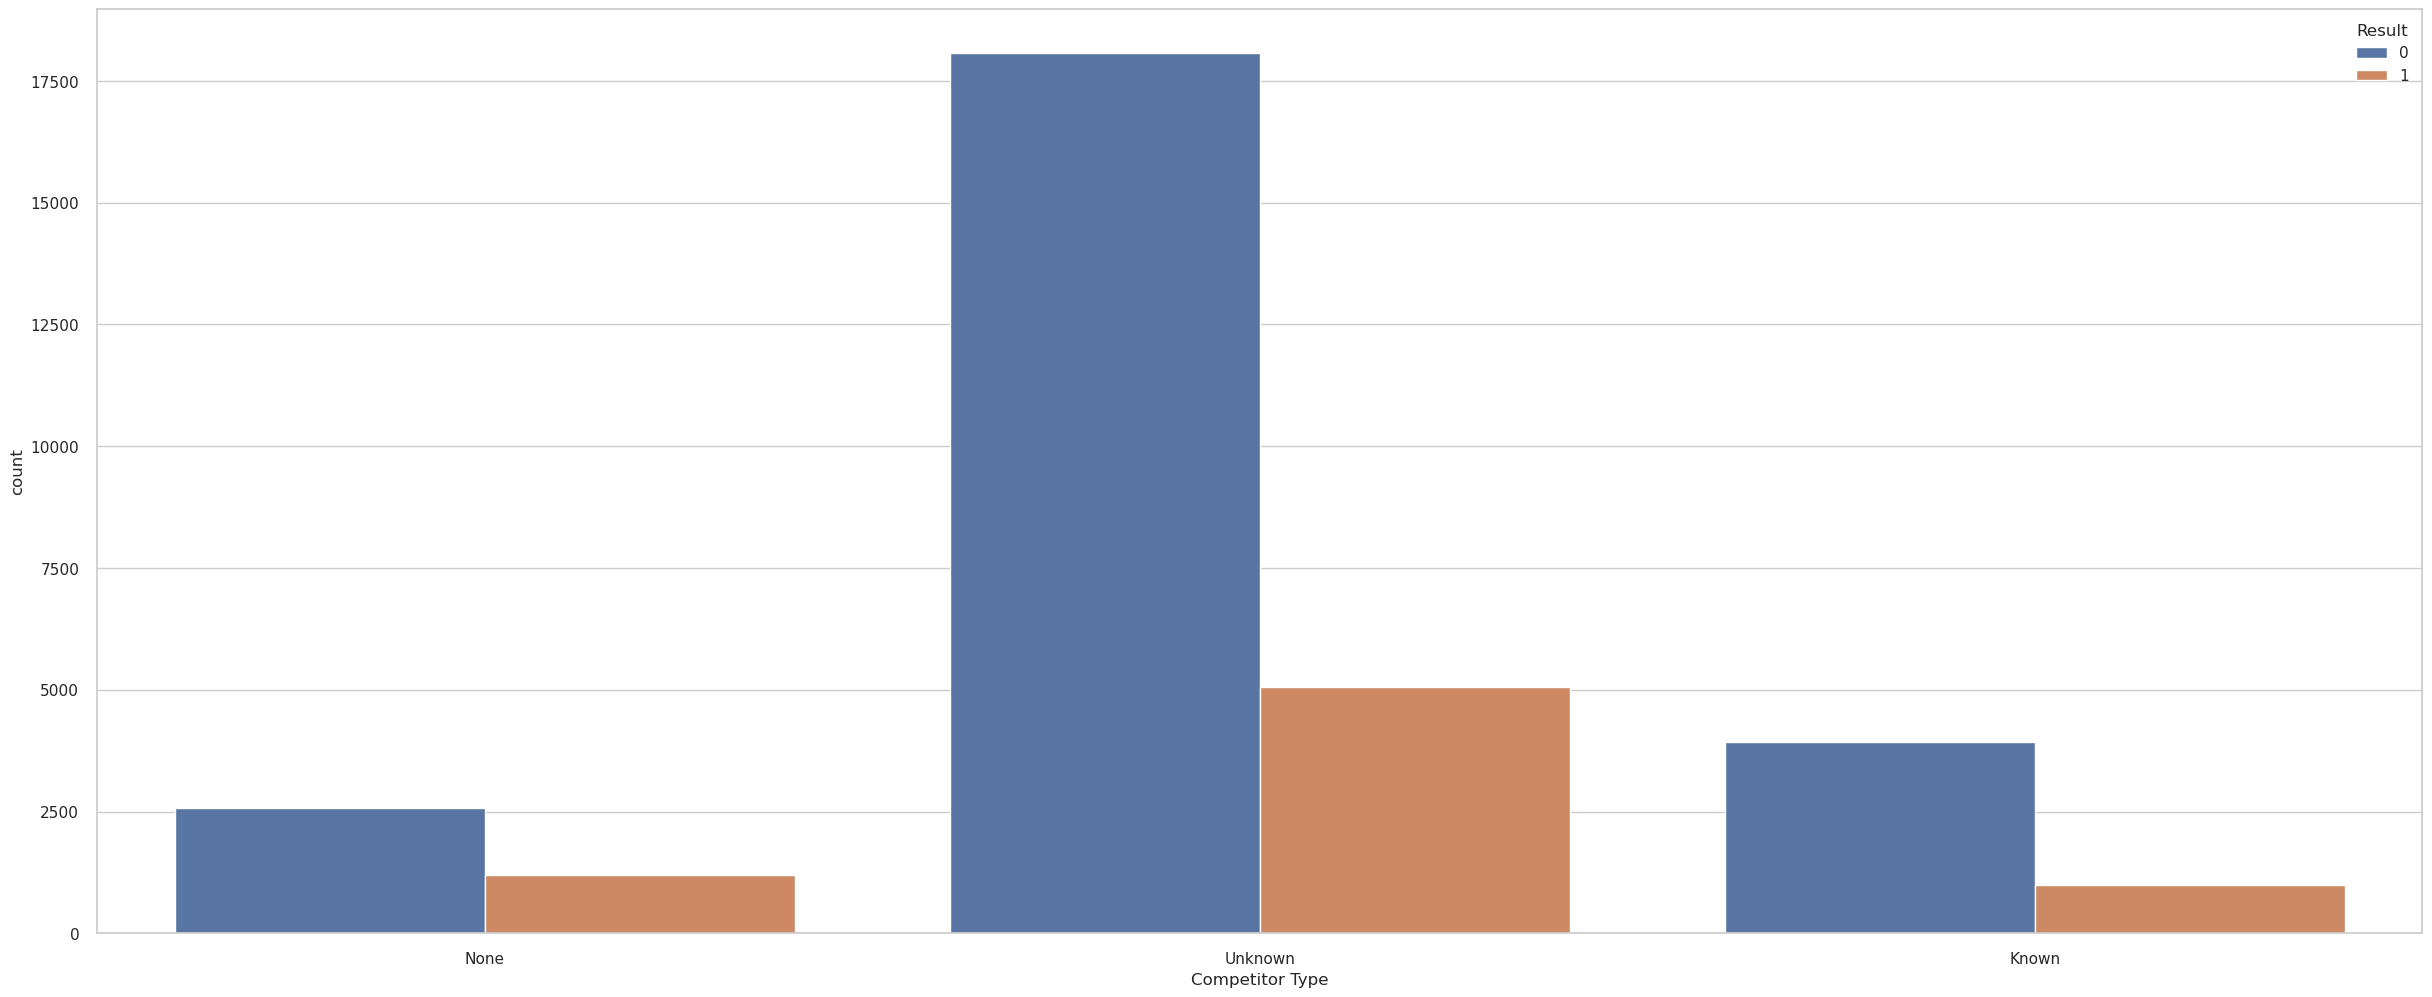

In [21]:
plt.figure(figsize=[30, 12])
sns.countplot(x = 'Competitor Type', hue = 'Result', data = df)

<AxesSubplot:xlabel='Supplies Group', ylabel='count'>

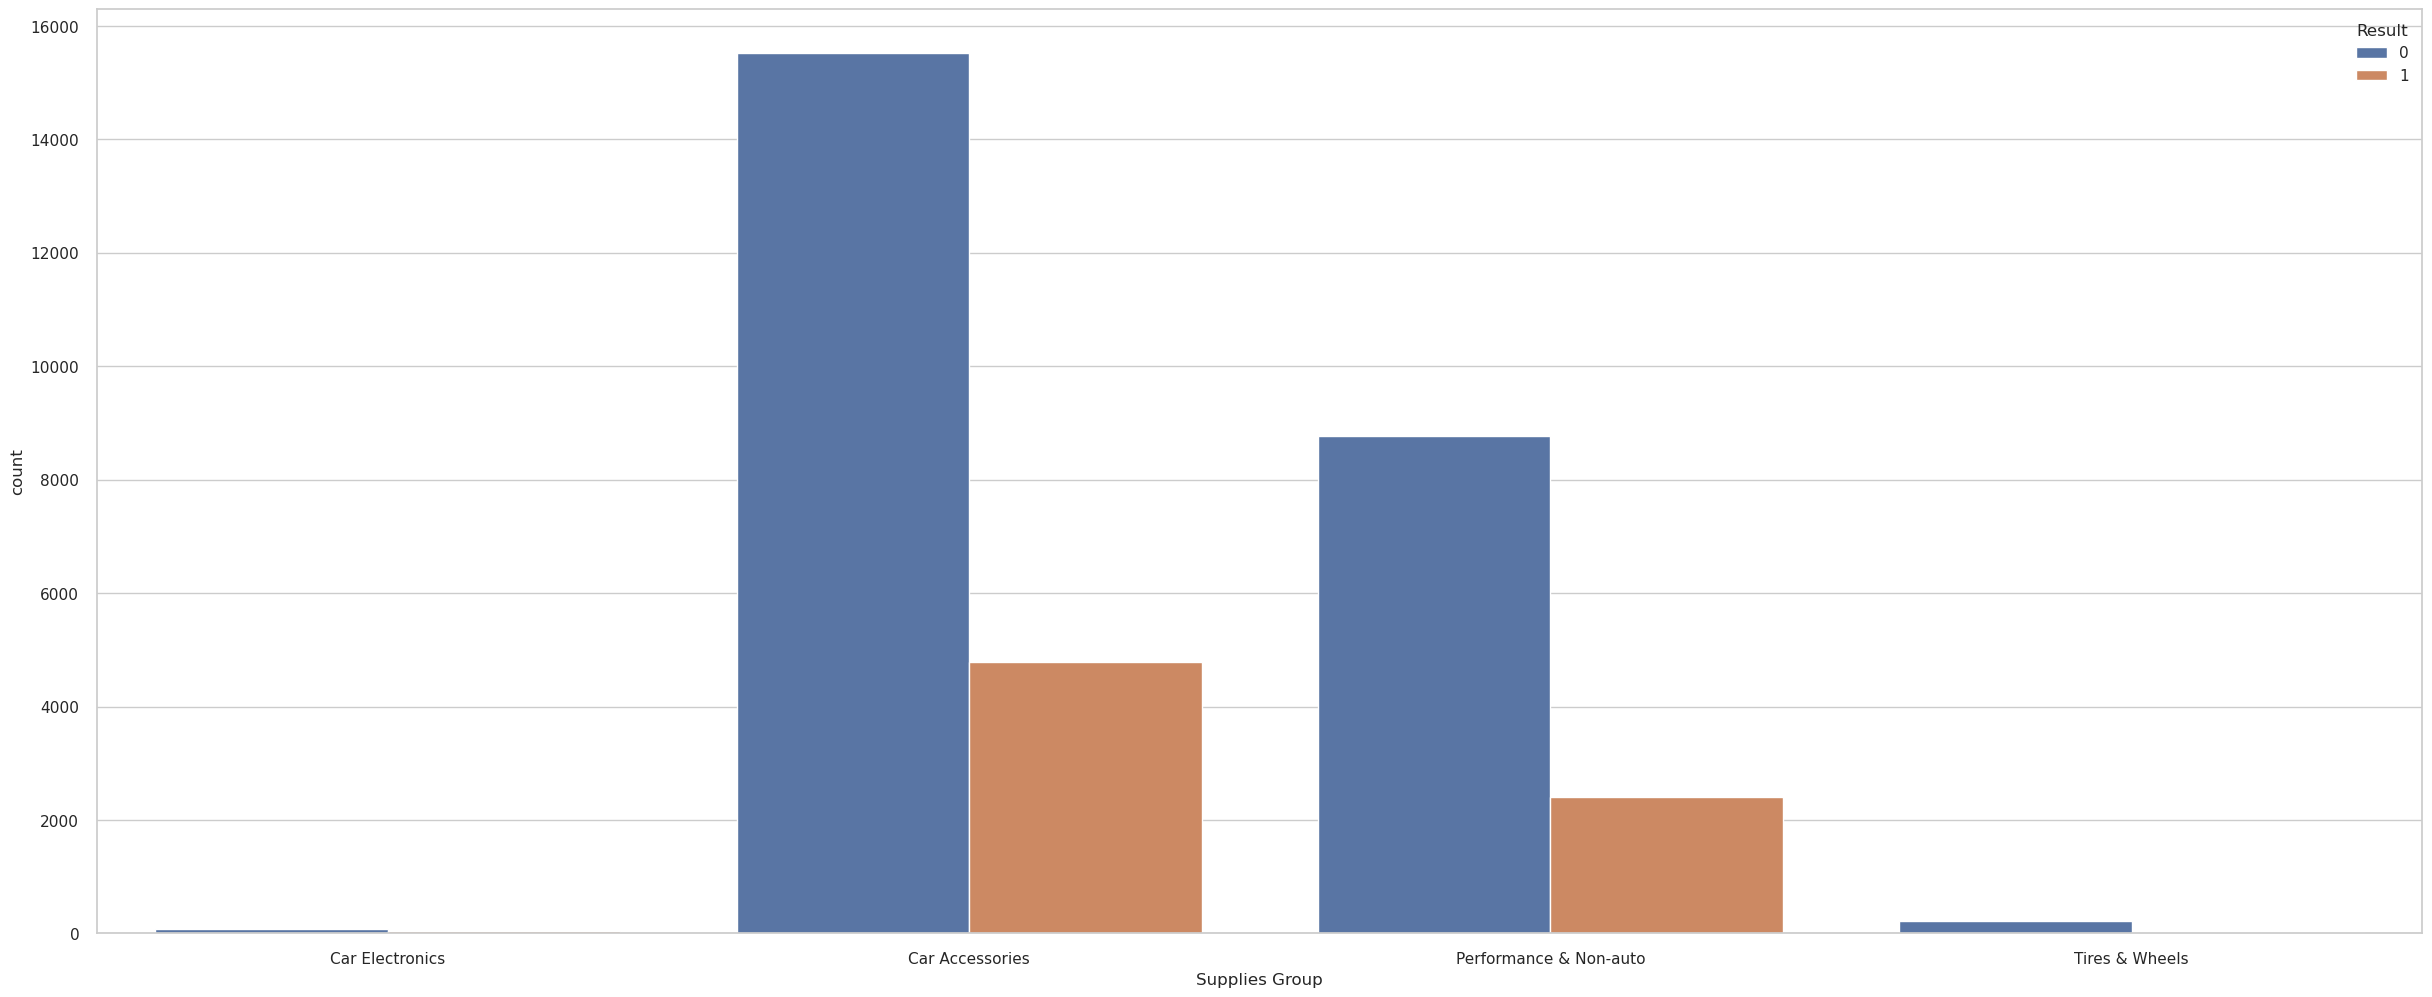

In [22]:
plt.figure(figsize=[30, 12])
sns.countplot(x = 'Supplies Group', hue = 'Result', data = df)

<AxesSubplot:xlabel='Supplies Subgroup', ylabel='count'>

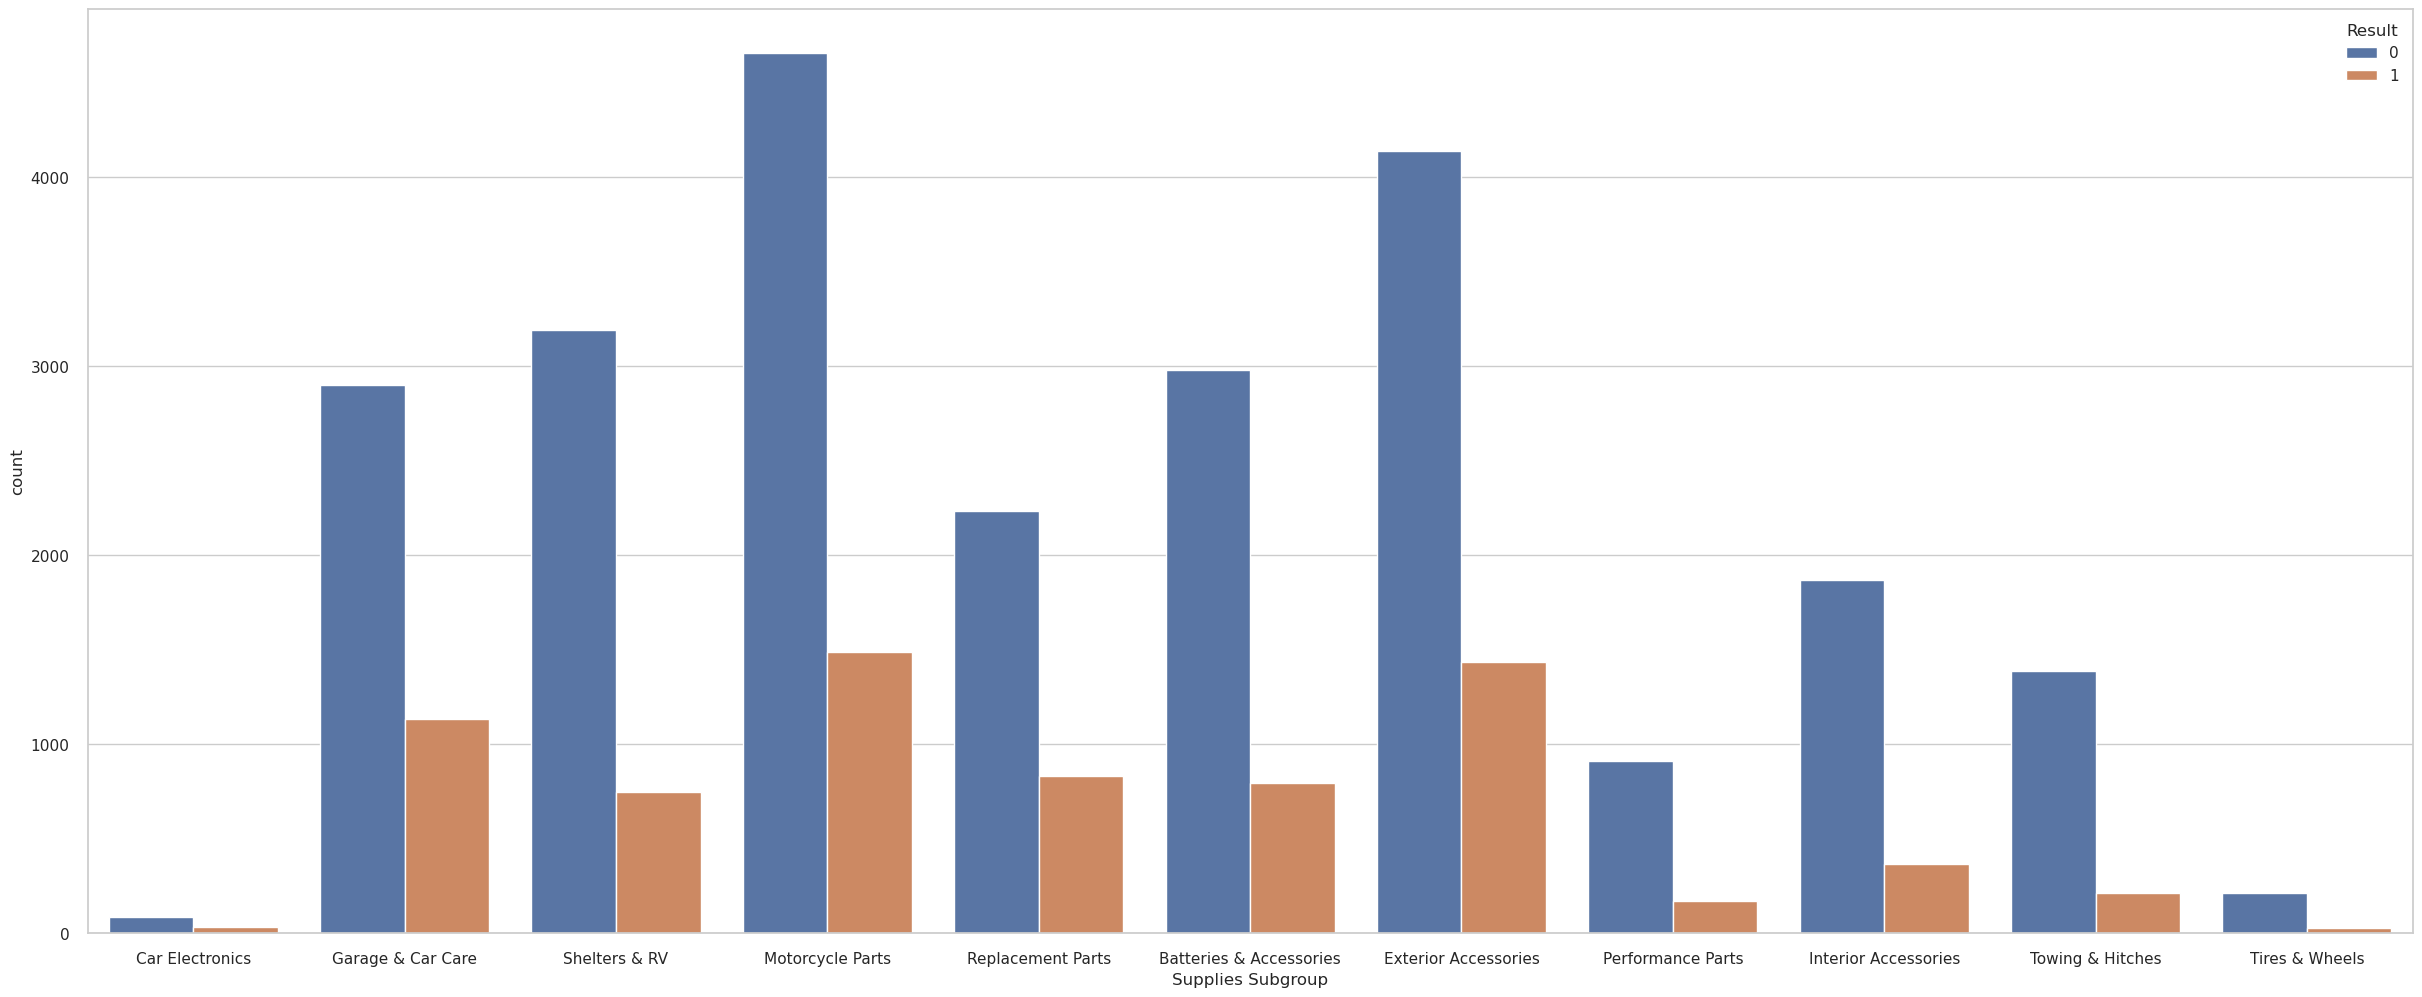

In [23]:
plt.figure(figsize=[30, 12])
sns.countplot(x = 'Supplies Subgroup', hue = 'Result', data = df)

## Limpieza (limpieza valores atípicos para mejorar la etapa de entrenamiento)
Eliminar variables identificadoras o llaves

In [24]:
def select_outlier_columns(df):
    """
    Selecciona las columnas del dataframe df que contengan datos atípicos, utilizando el rango intercuartílico.
    """
    # Calcula el rango intercuartílico para cada columna
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Identifica las filas con valores atípicos
    outlier_rows = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

    # Selecciona las columnas con al menos un valor atípico
    outlier_cols = outlier_rows.any()

    # Devuelve las columnas con valores atípicos
    return df.columns[outlier_cols]
    

outlier_cols = select_outlier_columns(df.drop(['Opportunity Number', 'Opportunity Result'], axis=1))
print(outlier_cols)

Index(['Supplies Subgroup', 'Supplies Group', 'Client Size By Revenue',
       'Client Size By Employee Count', 'Revenue From Client Past Two Years',
       'Competitor Type', 'Deal Size Category', 'Country_Code', 'Result'],
      dtype='object')


<AxesSubplot:xlabel='Opportunity Result', ylabel='Client Size By Revenue'>

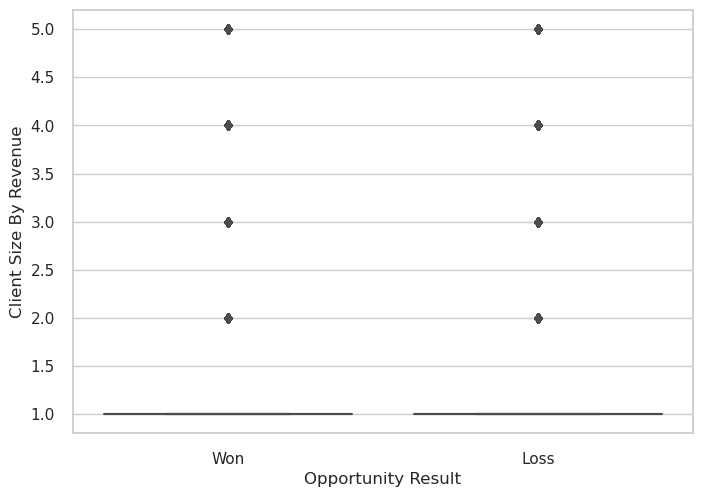

In [25]:
sns.boxplot(x = 'Opportunity Result', y = 'Client Size By Revenue', data = df)

<AxesSubplot:xlabel='Opportunity Result', ylabel='Client Size By Employee Count'>

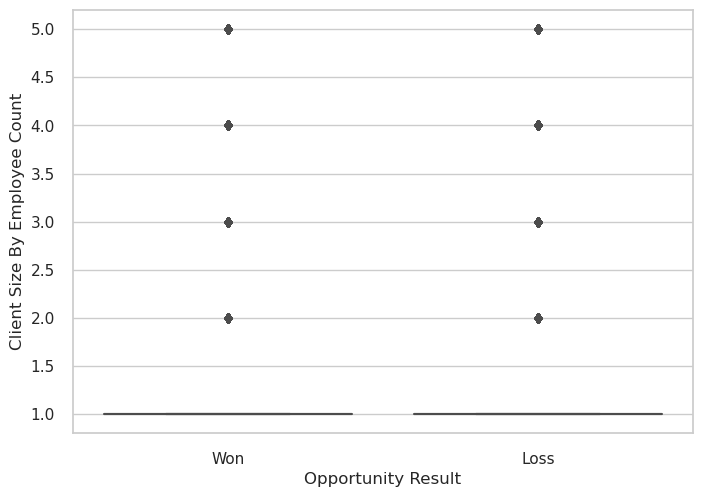

In [26]:
sns.boxplot(x = 'Opportunity Result', y = 'Client Size By Employee Count', data = df)

<AxesSubplot:xlabel='Opportunity Result', ylabel='Revenue From Client Past Two Years'>

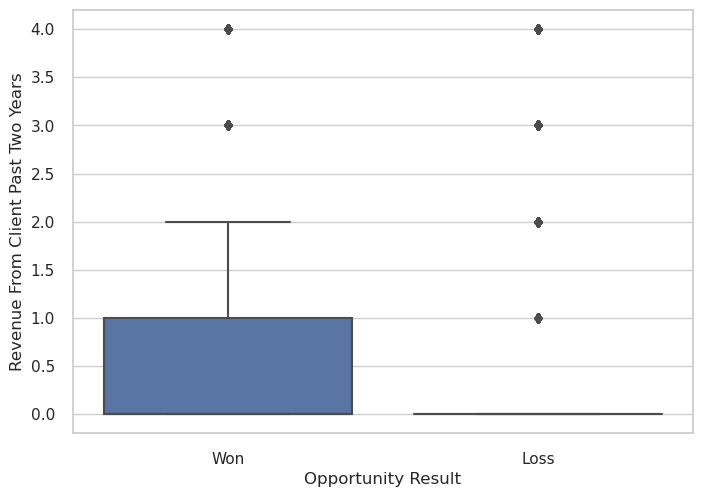

In [27]:
sns.boxplot(x = 'Opportunity Result', y = 'Revenue From Client Past Two Years', data = df)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31823 entries, 0 to 31822
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       31515 non-null  float64
 1   Supplies Subgroup                        31823 non-null  object 
 2   Supplies Group                           31823 non-null  object 
 3   Opportunity Result                       31823 non-null  object 
 4   Sales Stage Change Count                 31823 non-null  int64  
 5   Total Days Identified Through Closing    31823 non-null  int64  
 6   Total Days Identified Through Qualified  31823 non-null  int64  
 7   Opportunity Amount USD                   31823 non-null  int64  
 8   Client Size By Revenue                   31823 non-null  int64  
 9   Client Size By Employee Count            31823 non-null  int64  
 10  Revenue From Client Past Two Years       31823

In [29]:
df = df.drop(['Opportunity Number', 'Opportunity Result'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31823 entries, 0 to 31822
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Supplies Subgroup                        31823 non-null  object 
 1   Supplies Group                           31823 non-null  object 
 2   Sales Stage Change Count                 31823 non-null  int64  
 3   Total Days Identified Through Closing    31823 non-null  int64  
 4   Total Days Identified Through Qualified  31823 non-null  int64  
 5   Opportunity Amount USD                   31823 non-null  int64  
 6   Client Size By Revenue                   31823 non-null  int64  
 7   Client Size By Employee Count            31823 non-null  int64  
 8   Revenue From Client Past Two Years       31823 non-null  int64  
 9   Competitor Type                          31823 non-null  object 
 10  Deal Size Category                       31823

# Procesamiento de datos

Conversión de datos categoricos a númericos usando OneHotEncoder, y normalización del dataset de entrenamiento para obtener mejores rendimientos en la étapa de entrenamiento y permmitir a los algoritmos de optimización de los modelos llegar a una minimización del error

In [30]:
X_cat = df[['Supplies Subgroup', 'Supplies Group', 'Competitor Type']]
X_cat

Supplies Subgroup          Supplies Group Competitor Type
0              Car Electronics         Car Electronics            None
1            Garage & Car Care         Car Accessories         Unknown
2                Shelters & RV  Performance & Non-auto         Unknown
3             Motorcycle Parts  Performance & Non-auto         Unknown
4            Replacement Parts         Car Accessories         Unknown
...                        ...                     ...             ...
31818  Batteries & Accessories         Car Accessories         Unknown
31819         Motorcycle Parts  Performance & Non-auto         Unknown
31820        Garage & Car Care         Car Accessories         Unknown
31821     Exterior Accessories         Car Accessories         Unknown
31822        Performance Parts  Performance & Non-auto         Unknown

[31823 rows x 3 columns]

In [31]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
3      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
31818  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
31819  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
31820  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
31821  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
31822  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

        14   15   16   17  
0      0.0  0.0  1.0  0.0  
1      0.0  0.0  0.0  1.0  
2      0.0  0.0  0.0  1.0  
3      0.0  0.0  0.0  1.0  
4      0.0  0.0  0.0  1.0  
...    ...  ...  ...  ...  
31818  0.0  0.0  0.0  1.0  
31819  0.0  0.0  0.0  1.0  
31820  0.0  0.0  0.0  1.0  
31821  0.0  0.0  0.0  1.0  
31822  0.0  0.0  0.0  1.0  

[31823 rows x 18 columns]

In [32]:
X_numerical = df.drop(['Supplies Subgroup', 'Supplies Group', 'Competitor Type'], axis=1)
X_numerical

Sales Stage Change Count  Total Days Identified Through Closing  \
0                             5                                     94   
1                             4                                      4   
2                             4                                     71   
3                             2                                     46   
4                             3                                      6   
...                         ...                                    ...   
31818                         3                                      5   
31819                         5                                      3   
31820                         2                                      4   
31821                         2                                      3   
31822                         5                                      2   

       Total Days Identified Through Qualified  Opportunity Amount USD  \
0                                           90                  469000   
1                                            4                    5000   
2                                           71                  200000   
3                                           46                  120000   
4                                            6                   12000   
...                                        ...                     ...   
31818                                        5                   20000   
31819                                        3                   50000   
31820                                        4                   15000   
31821                                        3                   30000   
31822                                        1                   50000   

       Client Size By Revenue  Client Size By Employee Count  \
0                           1                              1   
1                           3                              2   
2                           3                              1   
3                           5                              1   
4                           1                              1   
...                       ...                            ...   
31818                       1                              1   
31819                       1                              1   
31820                       1                              1   
31821                       1                              1   
31822                       1                              1   

       Revenue From Client Past Two Years  Deal Size Category        Lat  \
0                                       0                   6 -16.130262   
1                                       0                   1 -16.130262   
2                                       0                   5 -16.130262   
3                                       0                   5 -16.130262   
4                                       0                   2 -16.130262   
...                                   ...                 ...        ...   
31818                                   3                   2   7.318882   
31819                                   0                   4   5.309766   
31820                                   1                   2   7.318882   
31821                                   0                   3   7.318882   
31822                                   0                   4   5.309766   

             Lon  Country_Code  Result  
0     -63.808594             1       1  
1     -63.808594             1       1  
2     -63.808594             1       0  
3     -63.808594             1       0  
4     -63.808594             1       1  
...          ...           ...     ...  
31818 -65.170898             7       1  
31819 -66.401367             7       0  
31820 -65.170898             7       1  
31821 -65.170898             7       0  
31822 -66.401367             7       1  

[31823 rows x 12 columns]

In [33]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
Y = X_all['Result']
X_all = X_all.drop(['Result'],axis=1)
X_all

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
3      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
31818  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
31819  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
31820  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
31821  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
31822  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

        14   15   16   17  Sales Stage Change Count  \
0      0.0  0.0  1.0  0.0                         5   
1      0.0  0.0  0.0  1.0                         4   
2      0.0  0.0  0.0  1.0                         4   
3      0.0  0.0  0.0  1.0                         2   
4      0.0  0.0  0.0  1.0                         3   
...    ...  ...  ...  ...                       ...   
31818  0.0  0.0  0.0  1.0                         3   
31819  0.0  0.0  0.0  1.0                         5   
31820  0.0  0.0  0.0  1.0                         2   
31821  0.0  0.0  0.0  1.0                         2   
31822  0.0  0.0  0.0  1.0                         5   

       Total Days Identified Through Closing  \
0                                         94   
1                                          4   
2                                         71   
3                                         46   
4                                          6   
...                                      ...   
31818                                      5   
31819                                      3   
31820                                      4   
31821                                      3   
31822                                      2   

       Total Days Identified Through Qualified  Opportunity Amount USD  \
0                                           90                  469000   
1                                            4                    5000   
2                                           71                  200000   
3                                           46                  120000   
4                                            6                   12000   
...                                        ...                     ...   
31818                                        5                   20000   
31819                                        3                   50000   
31820                                        4                   15000   
31821                                        3                   30000   
31822                                        1                   50000   

       Client Size By Revenue  Client Size By Employee Count  \
0                           1                              1   
1                           3                              2   
2                           3                              1   
3                           5                              1   
4                           1                              1   
...                       ...                            ...   
31818                       1                              1   
31819                       1                              1   
31820                       1                              1   
31821                       1                              1   
31822                       1                              1   

       Revenue From Client Past Two Years  Deal Size Category        Lat  \
0                                       0                   6 -16.130262   
1           

In [34]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
X_train.columns = X_all.columns
X_test.columns = X_all.columns

# Etapa de selección de variables (!!!IMPORTANTE!!!)


Aún no inicia el entrenamiento se realiza una etapa de selección de variables antes de realizar el entrenamiento:


1.  Se entrena un modelo XGBOOST para ver el Feature importance y tener ídea de las variables más significativas
2.  Se realizan ejercicios con regresiones logísticas para ver los Betas de la regresión así como los P valores y descartar variables
3.  Se realiza un ejercicio con AUTO-ML Pycaret para ver el feature importance

In [35]:
model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='reg:squarederror',
              predictor='auto', ...)

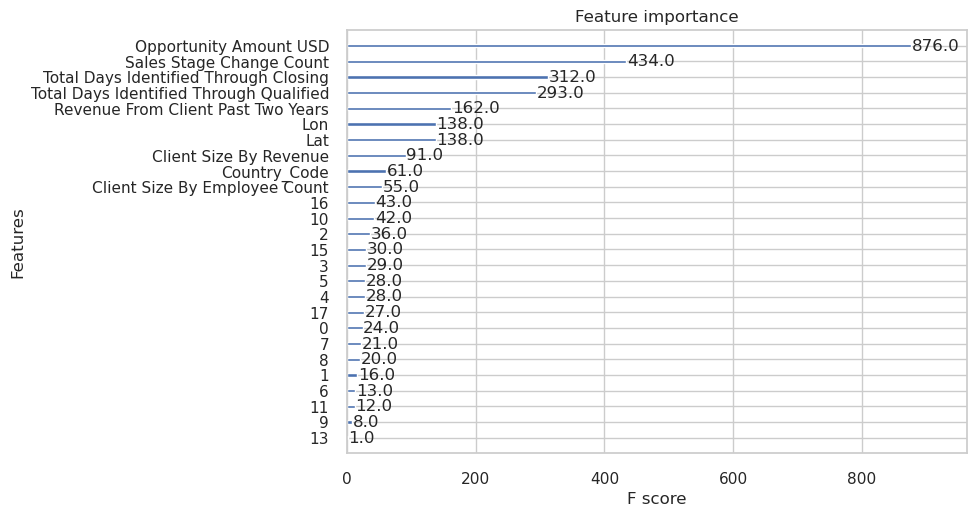

In [36]:
xgb.plot_importance(model,ax=plt.gca())
plt.show()

In [37]:
y_pred = model.predict(X_test)
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 85.74660633484163 %


<AxesSubplot:>

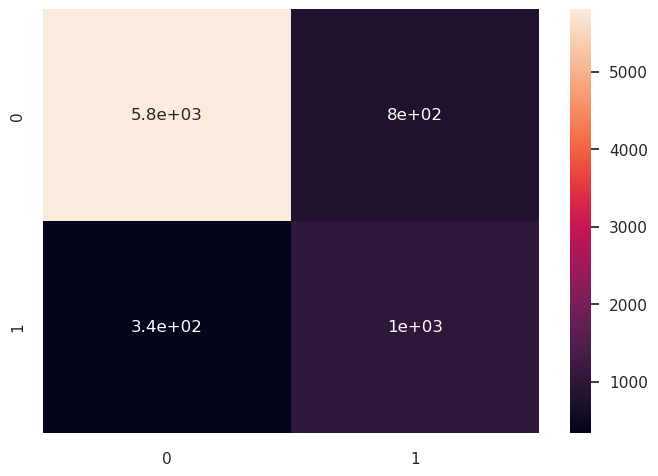

In [38]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6143
           1       0.75      0.56      0.64      1813

    accuracy                           0.86      7956
   macro avg       0.81      0.75      0.78      7956
weighted avg       0.85      0.86      0.85      7956



In [40]:
s = setup(data = df, target = 'Result', session_id=123)

In [41]:
best_model = compare_models()

In [42]:
print(best_model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)


In [43]:
modelo = create_model('xgboost')

In [44]:
modelo_tuneado = tune_model(modelo)

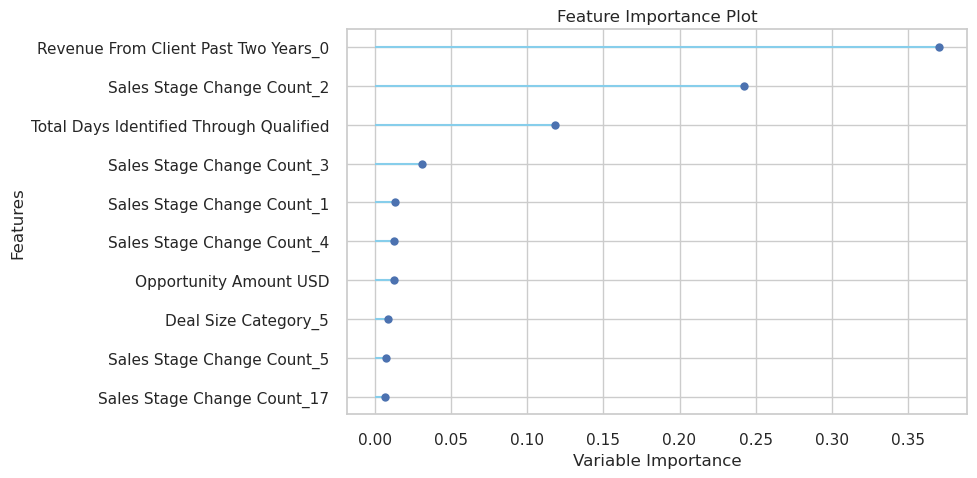

In [45]:
plot_model(modelo_tuneado, plot='feature')

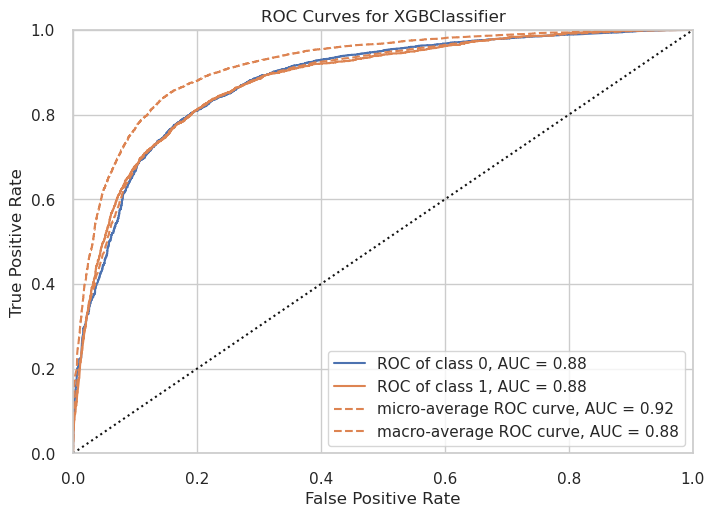

In [46]:
plot_model(modelo_tuneado, plot = 'auc')

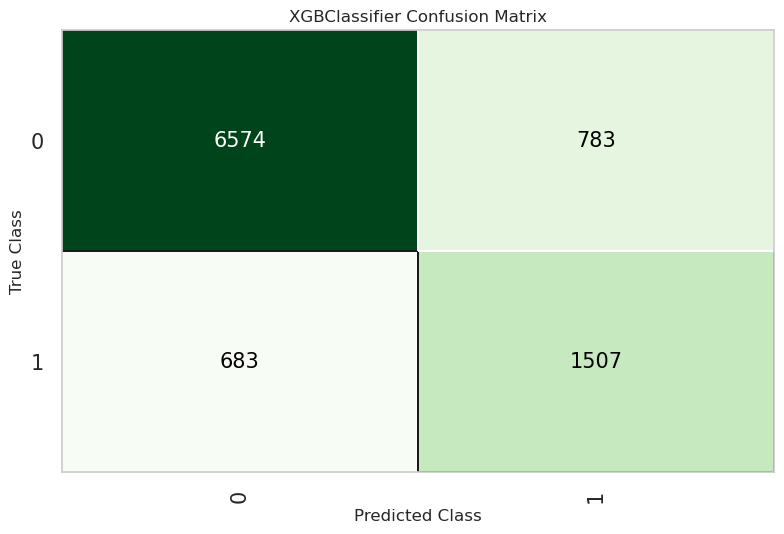

In [47]:
plot_model(modelo_tuneado, plot = 'confusion_matrix')

In [48]:
evaluate_model(modelo_tuneado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [49]:
import statsmodels.api as sm 

X_logit = df.drop(['Result', 'Supplies Subgroup', 'Supplies Group', 'Competitor Type'], axis=1)
Y_logit = df['Result']

model_logit = sm.Logit(endog=Y_logit, exog=X_logit).fit()

print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.399768
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                31823
Model:                          Logit   Df Residuals:                    31812
Method:                           MLE   Df Model:                           10
Date:                Sun, 15 Jan 2023   Pseudo R-squ.:                  0.2548
Time:                        22:18:15   Log-Likelihood:                -12722.
converged:                       True   LL-Null:                       -17072.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Sales Stage Change Count                    0.4743

In [50]:
np.exp(model_logit.params)

Sales Stage Change Count                   1.606812
Total Days Identified Through Closing      1.013296
Total Days Identified Through Qualified    0.893627
Opportunity Amount USD                     1.000003
Client Size By Revenue                     1.028187
Client Size By Employee Count              1.007652
Revenue From Client Past Two Years         1.927520
Deal Size Category                         0.617953
Lat                                        0.999129
Lon                                        1.010463
Country_Code                               1.055810
dtype: float64

In [51]:
X2 = scaler.fit_transform(X_logit)

X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size = 0.25)

In [52]:
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
print(list(zip(model_lr.coef_)))

[(array([  8.14525487,  -4.4984665 , -12.41497416,   2.4977781 ,
         0.1142417 ,   0.11092621,   2.54385369,  -2.73351966,
        -0.09131907,   0.04187682,   0.17886068]),)]


In [54]:
X_logit.columns

Index(['Sales Stage Change Count', 'Total Days Identified Through Closing',
       'Total Days Identified Through Qualified', 'Opportunity Amount USD',
       'Client Size By Revenue', 'Client Size By Employee Count',
       'Revenue From Client Past Two Years', 'Deal Size Category', 'Lat',
       'Lon', 'Country_Code'],
      dtype='object')

# Resultados selección de variables

Realizando los tres ejercicios se obtiene que las variables ['Lon', 'Lat', 'Client Size By Revenue', 'Client Size By Employee Count'] no aportan al ejercicio y se eliminan en las siguientes etapas de entrenamiento para probar la hipotesis de una mejora en las métricas

El dataset Countries no se adjunta al dataset de entrenamiento débido a que los paises ya se encuentran transformados en una variable discreta ordinal

# Entrenamiento con variables seleccionadas

In [55]:
s2 = setup(data = df.drop(['Lon', 'Lat', 'Client Size By Revenue', 'Client Size By Employee Count'], axis=1), target = 'Result', session_id=123)

In [56]:
best_model = compare_models()

In [57]:
print(best_model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)


In [58]:
modelo = create_model('xgboost')

In [59]:
modelo_tuneado = tune_model(modelo)

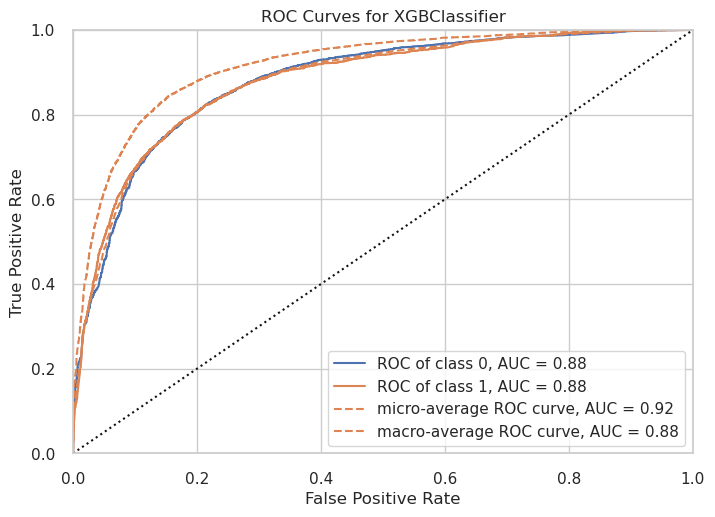

In [60]:
plot_model(modelo_tuneado, plot = 'auc')

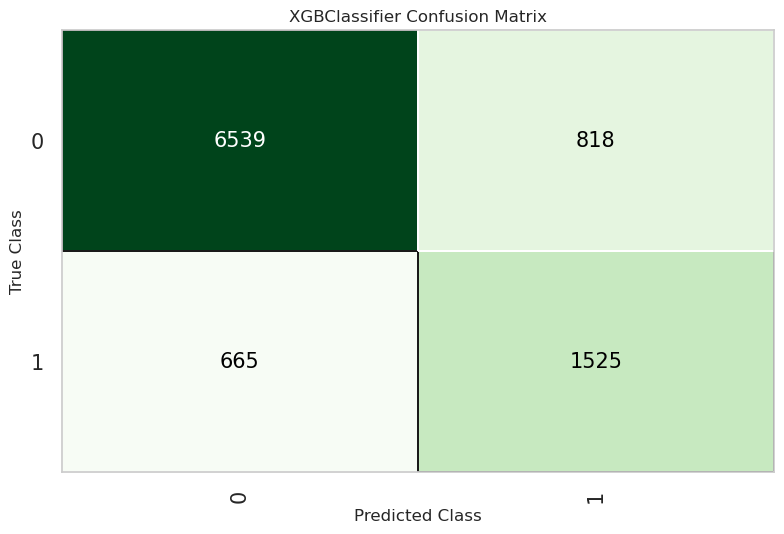

In [61]:
plot_model(modelo_tuneado, plot = 'confusion_matrix')

In [62]:
evaluate_model(modelo_tuneado)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [63]:
X_numerical = df.drop(['Supplies Subgroup', 'Supplies Group', 'Competitor Type','Lon', 'Lat', 'Client Size By Revenue', 'Client Size By Employee Count'], axis=1)
Y = df['Result']
X_numerical = X_numerical.drop(['Result'], axis=1)
X_numerical


Sales Stage Change Count  Total Days Identified Through Closing  \
0                             5                                     94   
1                             4                                      4   
2                             4                                     71   
3                             2                                     46   
4                             3                                      6   
...                         ...                                    ...   
31818                         3                                      5   
31819                         5                                      3   
31820                         2                                      4   
31821                         2                                      3   
31822                         5                                      2   

       Total Days Identified Through Qualified  Opportunity Amount USD  \
0                                           90                  469000   
1                                            4                    5000   
2                                           71                  200000   
3                                           46                  120000   
4                                            6                   12000   
...                                        ...                     ...   
31818                                        5                   20000   
31819                                        3                   50000   
31820                                        4                   15000   
31821                                        3                   30000   
31822                                        1                   50000   

       Revenue From Client Past Two Years  Deal Size Category  Country_Code  
0                                       0                   6             1  
1                                       0                   1             1  
2                                       0                   5             1  
3                                       0                   5             1  
4                                       0                   2             1  
...                                   ...                 ...           ...  
31818                                   3                   2             7  
31819                                   0                   4             7  
31820                                   1                   2             7  
31821                                   0                   3             7  
31822                                   0                   4             7  

[31823 rows x 7 columns]

In [105]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_numerical)
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
X_train.columns = X_numerical.columns
X_test.columns = X_numerical.columns

In [121]:
X_train

0         1         2         3    4         5         6
8726   0.052632  0.041667  0.041667  0.010000  0.0  0.166667  0.333333
34321  0.000000  0.000000  0.000000  0.003273  0.0  0.000000  1.000000
31897  0.052632  0.000000  0.000000  0.001505  0.0  0.000000  0.166667
5802   0.105263  0.020833  0.015625  0.011627  1.0  0.166667  0.166667
4542   0.052632  0.010417  0.010417  0.120481  0.0  0.666667  0.166667
...         ...       ...       ...       ...  ...       ...       ...
13207  0.052632  0.000000  0.000000  0.015000  0.0  0.166667  0.333333
15805  0.263158  0.130208  0.130208  0.100000  0.0  0.666667  0.500000
12263  0.157895  0.057292  0.057292  0.020000  0.0  0.166667  0.333333
11801  0.105263  0.119792  0.119792  0.015000  0.0  0.166667  0.333333
2502   0.052632  0.000000  0.000000  0.025000  0.0  0.333333  0.000000

[36865 rows x 7 columns]

In [65]:
model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.1, max_depth = 5, n_estimators = 100)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='reg:squarederror',
              predictor='auto', ...)

In [66]:
y_pred = model.predict(X_test)
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 86.23680241327301 %


<AxesSubplot:>

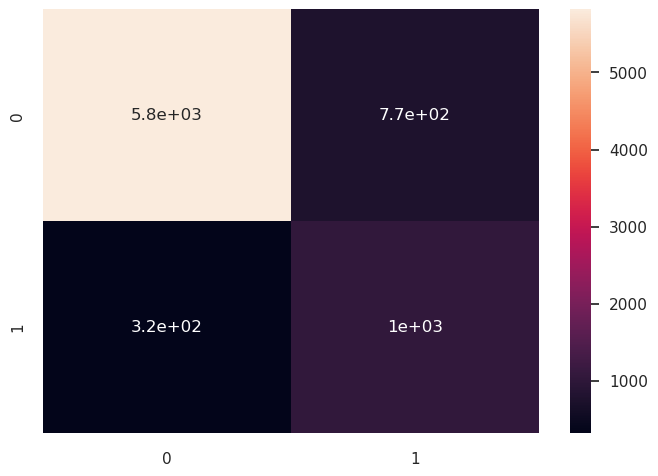

In [67]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6141
           1       0.76      0.58      0.66      1815

    accuracy                           0.86      7956
   macro avg       0.82      0.76      0.78      7956
weighted avg       0.86      0.86      0.86      7956



In [70]:
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_pred = model_lr.predict(X_test)

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 82.01357466063348 %


<AxesSubplot:>

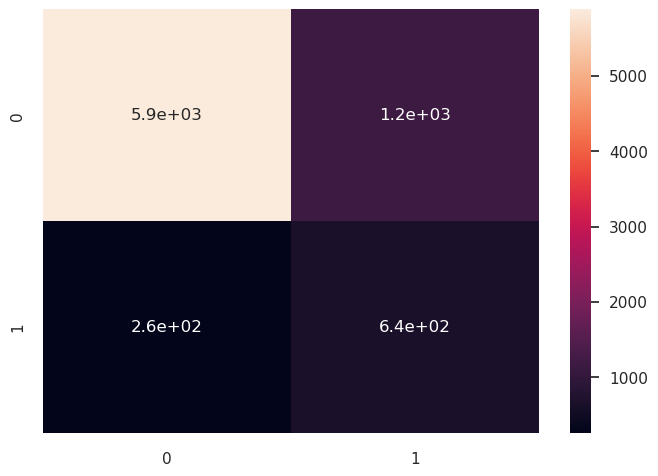

In [72]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6141
           1       0.71      0.35      0.47      1815

    accuracy                           0.82      7956
   macro avg       0.77      0.66      0.68      7956
weighted avg       0.81      0.82      0.80      7956



# Entrenamiento realizando balanceo de datos

In [106]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [107]:

evalset = [(X_train, y_train), (X_test,y_test)]

model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.001, max_depth = 5, n_estimators = 1000)

model.fit(X_train, y_train, eval_metric='error', eval_set=evalset)

[0]	validation_0-error:0.20616	validation_1-error:0.20319
[1]	validation_0-error:0.20616	validation_1-error:0.20319
[2]	validation_0-error:0.20616	validation_1-error:0.20319
[3]	validation_0-error:0.20616	validation_1-error:0.20319
[4]	validation_0-error:0.20616	validation_1-error:0.20319
[5]	validation_0-error:0.20616	validation_1-error:0.20319
[6]	validation_0-error:0.20616	validation_1-error:0.20319
[7]	validation_0-error:0.20616	validation_1-error:0.20319
[8]	validation_0-error:0.20594	validation_1-error:0.20311
[9]	validation_0-error:0.20616	validation_1-error:0.20319
[10]	validation_0-error:0.20594	validation_1-error:0.20311
[11]	validation_0-error:0.20594	validation_1-error:0.20311
[12]	validation_0-error:0.20594	validation_1-error:0.20311
[13]	validation_0-error:0.20594	validation_1-error:0.20311
[14]	validation_0-error:0.20594	validation_1-error:0.20311
[15]	validation_0-error:0.20594	validation_1-error:0.20311
[16]	validation_0-error:0.20594	validation_1-error:0.20311
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)

In [108]:
y_pred = model.predict(X_test)
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 81.45495972007485 %


In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      6095
           1       0.81      0.83      0.82      6194

    accuracy                           0.81     12289
   macro avg       0.81      0.81      0.81     12289
weighted avg       0.81      0.81      0.81     12289



<AxesSubplot:>

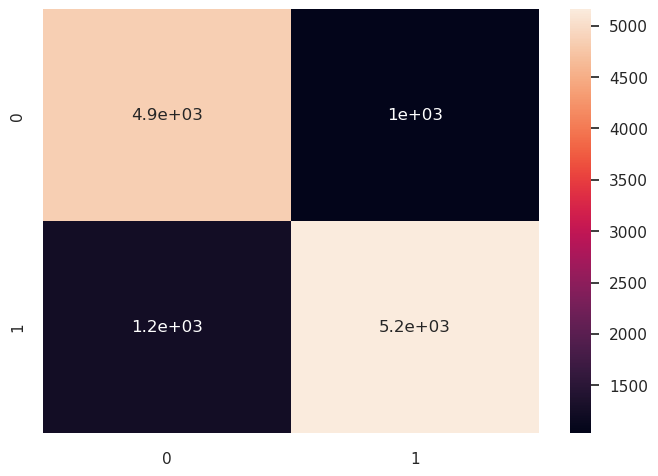

In [110]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

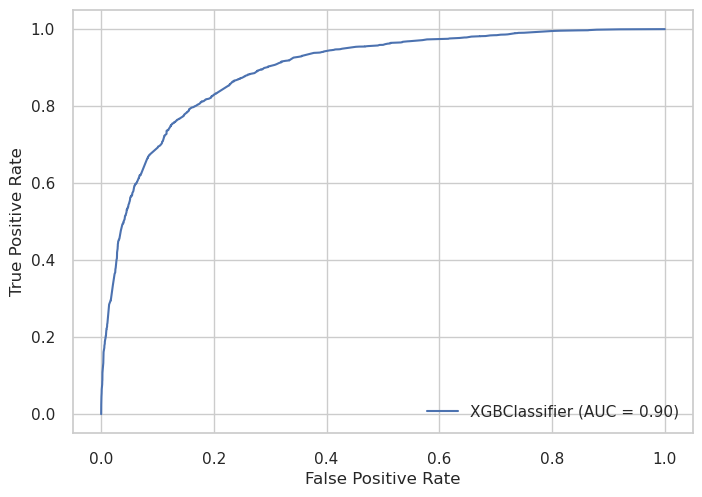

In [113]:
metrics.plot_roc_curve(model, X_test, y_test)
plt.show()

In [119]:
pickle.dump(model, open('../Model/modelo_xgboost_09_AUC.pkl', 'wb'))

In [122]:
pred_p = model.predict_proba(X_test)[:,1]
pred_p

array([0.5044914 , 0.3359533 , 0.6307022 , ..., 0.32948074, 0.6111744 ,
       0.6333066 ], dtype=float32)

In [145]:
cm = confusion_matrix(y_new, y_test)
y_new = [1 if i > 0.54 else 0 for i in pred_p]

<AxesSubplot:>

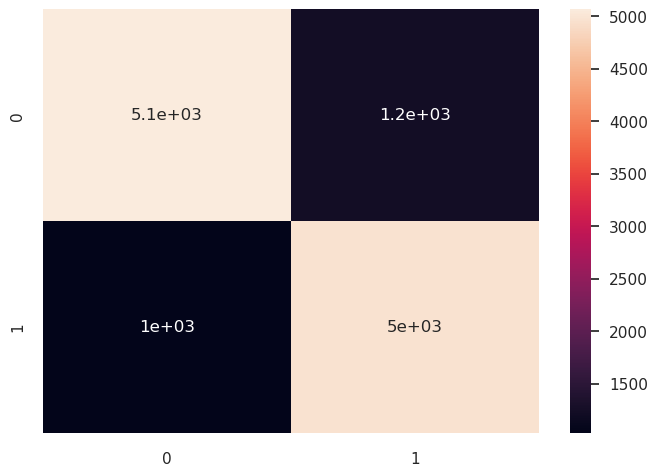

In [146]:
cm = confusion_matrix(y_new, y_test)
sns.heatmap(cm, annot=True)